# Анализ рынка автомобилей в Казахстане за период январь-сентябрь 2019

**Цель: провести анализ рынка автомобилей Казахстана**

**Задачи:** 
1. тщательно предобработать данные:  
   * привести данные в столбцах к единобразию  
   * избавиться или исправить некорректные значения  
   * закодировать данные при необходимости (например, страна-производитель);  
2. провести исследовательский анализ данных;   
3. проанализировать рынок автомобилей Казахстана 
4. провести анализ позиции Меркур Авто: внутренная и внешняя среда

**Задания для работы:**
- Анализ рынка (делим на коммерческий и некоммерческий транспорт):
- Емкость рынка автомобилей: в денежном и количественном выражении;
- Марки лидеры на рынке автомобилей;
- Модели-лидеры на рынке;
- Динамика рынка: общая, по сегментам;
- Продажи автомобилей в разрезе бренд / сегмент;
- Продажи по маркам;
- Продажи автоцентров;
- Продажи по регионам;
- Проверить гипотезу: 
   * стоимость автомобиля зависит от уровня развития
   * региона (средней заработной платы по региону);
- RFM-анализ моделей авто (показатели Frequency и Monetary).

Анализ положения Меркур Авто:
- Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
- Продажи по регионам: общие, по маркам;
- Конкурентный анализ;
- BCG анализ (анализ продаж по моделям).

В датасете представлены данные о продажах автомобилей на территории Казахстана в январе-сентябре 2019 года всеми
официальными автодилерами, которые собрала статистическая компания-агрегатор.

Данные содержат ошибки и "шум":
* Типы данных в столбцах не соответствуют представленным данным (например, цифры с типом object);
* Проблемы эксель: разделитель десятичной части числа запятая, а не точка;
* Нет единообразия: например, объем двигателя в столбце может быть записан разными способами: 1,5, 1.5, 1.5 л., 1,5 L, 1.5L
* Человеческие ошибки: например, в столбце объем двигателя может быть значение 200 лошадиных сил или объем двигателя 26 вместо 2,6
* Пропуски и другие недочеты.

**Описание данных:**  
- Год продажи
- Месяц продажи (январь - сентябрь)
- Компания – название автоцентра
- Бренд – название продаваемой марки автомобиля
- Модель – название модели автомобиля
- Модификация – модификация модели автомобиля
- Год выпуска – год производства автомобиля
- Страна-производитель – страна, где произведен автомобиль
- Вид топлива – бензин, дизель, электричество, гибрид
- Объём двигателя – объем двигателя автомобиля в литрах
- Коробка передач – оставляем два варианта: автоматическая, механическая(где не механика, ставим автомат)
- Тип привода - оставляем: RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное
- Сегмент – сегмент, к которому относится авто
- Регион – город продажи
- Наименование дилерского центра – совпадает с компанией
- Тип клиента – юридическое или физическое лицо 
- Форма расчета – наличный и безналичный расчет
- Количество – количество автомобилей в заказе
- Цена, USD – цена автомобиля
- Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок, если есть)
- Область – область/регион, в котором осуществлена продажа
- Сегментация 2013 – сегмент автомобиля актуальный
- Класс 2013 – класс автомобиля актуальный
- Сегментация Eng – английская сегментация
- Локализация производства – совпадает со страной производителем

In [25]:
# выгрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from IPython.display import HTML, display
import locale

locale.setlocale(locale.LC_TIME, 'ru_RU')
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.2f}'.format) 
warnings.simplefilter(action='ignore')

#настроим стили визуализации
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style('darkgrid')

table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

In [2]:
# выгружаем данные
df = pd.read_csv('auto_kz_2019.csv', sep=';', decimal = ',')
df.head(5)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [3]:
# запомним размерность исходных данных
shape_dirty = df.shape
print(f'Всего {shape_dirty[0]} наблюдений и {shape_dirty[1]} признаков')

Всего 39966 наблюдений и 25 признаков


## Предобработка данных

In [4]:
# первоначальные названия столбцов
col_names_old = df.columns.to_list()

# новые названия
col_names_new = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year', 'country', 
                 'fuel_type','engine_volume', 'transmission_type', 'drive_type', 'segment', 'region', 'dealer', 
                 'client_type', 'payment_type','quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 
                 'class_2013', 'segment_eng', 'product_localization']

# создадим словарь со старыми и новыми названиями столбцов, чтобы легче было вспомнить соответствие
col_names_dict = dict(zip(col_names_old, col_names_new))

# переименуем наименования столбцов на английский для удобства в работе
df.columns = col_names_new

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  39966 non-null  int64  
 1   month                 39966 non-null  object 
 2   company               39966 non-null  object 
 3   brand                 39966 non-null  object 
 4   model                 39966 non-null  object 
 5   modification          36375 non-null  object 
 6   release_year          39465 non-null  object 
 7   country               39966 non-null  object 
 8   fuel_type             36826 non-null  object 
 9   engine_volume         35708 non-null  object 
 10  transmission_type     36711 non-null  object 
 11  drive_type            35677 non-null  object 
 12  segment               33205 non-null  object 
 13  region                39966 non-null  object 
 14  dealer                39966 non-null  object 
 15  client_type        

В исходных данных имеются 25 столбцов, для дальнейшего анализа пригодятся не все, поэтому удалим следующие столбцы:
`year` (все данные за 2019 год), `segment` и `segment_eng` (будем использовать укрупнённые значения из `segment_2013`), `region` (оставляем верхнеуровневое поле с областями), `dealer` (по смыслу дублирует информацию из столбца `company`), `payment_type` (слишком много пропусков, данные не восстановить), `product_localization` (по смыслу дублирует столбец `country`)

In [6]:
# удалим лишние столбцы
col_to_del = ['region', 'year', 'segment','segment_eng', 'dealer', 'payment_type', 'product_localization']

df.drop(columns = col_to_del, inplace = True)

df.shape

(39966, 18)

### Обработка значений по столбцам

Рассмотрим каждый столбец детальнее.

In [7]:
df.month.unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

Рассматриваем данные продаж с января по сентябрь 2019 года. Отсутсвует столбец в формате даты, имеются только текстовые обозначения месяцев. Поменяем названия месяцев в дату.

In [8]:
df.month = df.month.apply(lambda x: pd.to_datetime('2019'  + x , format='%Y%B').date())

In [9]:
df.month = pd.to_datetime(df.month)

In [10]:
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

В столбце с названиями автоцентров есть повторы (название как на кирилице так и на латинице), лишние пробелы: 'Mercur Auto' и 'Mercur Autos', 'Caspian Motors' и 'Каспиан Моторс', 'Astana Motors' и 'Astana Motors ', 'Autokapital' и 'Автокапитал', 'ММС Рус' и 'MMC RUS', 'Равон Моторс Казахстан' и 'Ravon Motors Kazakstan', 'Хино Моторс Казахстан' и 'Hino Motors '. 
Пропишем все названия на латинице.

По имеющимся данным, 'Mercur Auto' и 'Mercur Autos', а также 'Хино Моторс Казахстан' и 'Hino Motors ' - названия одних и те же компаний.

In [11]:
# уберём лишние пробелы в названиях 
df.company = df.company.str.strip()

# создадим словарь соответствий названий
comp_names_dict = {'Mercur Autos':'Mercur Auto', 'Каспиан Моторс':'Caspian Motors', 'Автокапитал':'Autokapital', 
                   'ММС Рус':'MMC RUS', 'Равон Моторс Казахстан':'Ravon Motors Kazakstan', 'Хино Моторс Казахстан':'Hino Motors'}

# переименуем автоцентры
df.company = df.company.map(comp_names_dict).fillna(df.company)

In [12]:
df.brand.unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

Названии марок Hyundai и Mercedes-Benz встречаются по два раза - отдельно выделены автобусы и грузовики, можем "укрупнить" их, в дальнейшем будем проводить анализ в разрезе сегментов.

In [13]:
# используем упрощённые наименования марок для Хёнде и Мерседеса по аналогии с другими марками
df.brand[df.brand == 'Hyundai Truck & Bus'] = 'Hyundai'
df.brand[df.brand == 'Mercedes-Benz Trucks'] = 'Mercedes-Benz'

In [14]:
print(df.model.nunique())
print(sorted(df.model.unique()))

273
['2206', '2217', '2310', '2705', '2752', '3', '3 серия', '300', '301', '3151', '3221', '32551', '3302', '3303', '3308', '3309', '3741', '3909', '3962', '4308', '4311', '43118', '4320', '4320-1951-40', '4320-1951-60', '43253', '43502', '44108', '45141', '45142', '45143', '4x4', '5 серия', '500', '5299', '53215', '53504', '53605', '54115', '5490', '5557', '58815Z', '6', '6 серия', '65111', '65115', '65116', '65117', '6520', '65206', '65225', '66052', '6606', '7 серия', '8 серия', '911 Carrera S', 'A-Class', 'A3', 'A4', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros', 'Almera', 'Amarok', 'Arkana', 'Aveo', 'BC 095', 'BC 211 MA', 'BJ1069VDJEA-F1', 'BJ3253DMPKB-AD', 'BS 106 A', 'BS 106 D', 'BWC6665GA5', 'C-Class', 'C-HR', 'CLA-Class', 'CLS-Class', 'CX-5', 'CX-9', 'Cabrio', 'Caddy Kasten ', 'Caddy Maxi Kombi', 'Camaro', 'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne', 'Cerato', 'Corolla', 'Countryman', 'County', 'Creta', 'D-MAX', 'Daily', 'Daily A', 'Daily V', 'Discovery', 'Discovery Spor

Всего имеется 273 уникальных названия моделей автомобилей. Явных ошибок в данных не наблюдается.

In [15]:
#Поменяем тип столбца с годом производства
df.release_year.unique()

#Исправим 2\xa0018', '2\xa0019'
df.release_year = df.release_year.str.replace('\xa0', '')

# Преобразуем типы данных для столбца release_year к int 
df.release_year = df.release_year.astype('Int32')

In [16]:
df.country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

В столбце с названиям стран-производителей ошибок нет.  
Для оптимизации закодируем названия стран в формат [Alpha3](https://www.artlebedev.ru/country-list/)

In [17]:
# Делаем датасет с кодами стран с сайта Артёма Лебедева,переименуем столбцы на английский язык для удобства

countries_codes = pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0] \
                [['Наименование', 'Полное наименование', 'Alpha3']] \
                .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'})

countries_codes.head()

,name,full_name,Alpha3
0,Абхазия,Республика Абхазия,ABH
1,Австралия,NaN,AUS
2,Австрия,Австрийская Республика,AUT
3,Азербайджан,Республика Азербайджан,AZE
4,Албания,Республика Албания,ALB


In [18]:
# Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран,значения - коды

countries_codes_dict = {}
for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

In [19]:
# Производим замену по словарю
df.country = df.country.apply(lambda x: countries_codes_dict.get(x, x))
df.country.unique()

array(['DEU', 'США', 'AUT', 'KAZ', 'RUS', 'Корея', 'JPN', 'THA', 'CHN',
       'UK', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE',
       'Белоруссия', 'BEL'], dtype=object)

In [20]:
# зашифруем оставшиеся названия вручную
df.country = df.country.str.replace('США', 'USA')
df.country = df.country.str.replace('Корея', 'KOR')
df.country = df.country.str.replace('Белоруссия', 'BLR')

In [21]:
df.fuel_type.unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

В столбце вида топлива есть повторы, приведём значения к единому виду: F - 'бензин', D -'дизель', H - 'гибрид', E - 'электро'.  
Также в столбце имеются странные значения: '2', '1,6', '0' - их надо рассмотреть детальнее

In [22]:
# уберём лишние пробелы
df.fuel_type = df.fuel_type.str.strip().str.lower()

# приведём названия к одному виду
df.fuel_type[df.fuel_type ==  'бензин'] = 'F'
df.fuel_type[df.fuel_type == 'дизель'] = 'D'
df.fuel_type[df.fuel_type.isin(['электро', 'электричество'])] = 'E'
df.fuel_type[df.fuel_type == 'гибрид'] = 'H'                    

In [23]:
# Посмотрим на оставшиеся значения внимательнее
df[(df.fuel_type == '2') | (df.fuel_type == '1,6') | (df.fuel_type == '0')]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
23723,2019-01-01,Renault Россия,Renault,Duster,E2GB4AG,2019,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV
23724,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23725,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23726,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,Кызылординская область,Внедорожники,Субкомпактные SUV
23727,2019-01-01,Renault Россия,Renault,Duster,E2GB4AG,2018,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23728,2019-01-01,Renault Россия,Renault,Duster,E1FB4JA,2018,RUS,"1,6",MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23729,2019-01-01,Renault Россия,Renault,Duster,E1FB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23730,2019-01-01,Renault Россия,Renault,Duster,E1FB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23731,2019-01-01,Renault Россия,Renault,Duster,E1FB4AG,2018,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23732,2019-01-01,Renault Россия,Renault,Duster,E1FB4AG,2018,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV


Типы двигателя '2' и '1,6' относятся к Renault Duster и Renault Sandero, судя по всему данные съехали по столбцам: в fuel_type указаны значения столбца engine_volume, в нём же указаны значения столбца transmission_type, а он в свою очередь содержит данные столбца drive_type.  
[Ссылка на характеристики Дастера](https://www.drom.ru/catalog/renault/duster/2018/)  
[Ссылка на характеристики Сандеро](https://www.drom.ru/catalog/renault/sandero/g_2012_2258/)  

Относительно значения '0', оно есть только у машины UAZ 3741 2018 г.в., похоже на пропуск, данные можно заполнить вручную.  
[Ссылка на характеристики Уаза](https://www.uazcenter-spb.ru/kommercheskie_avtomobili_uaz/klassicheskiy_kommercheskiy_ryad/klassicheskie_passajirskie/uaz_buhanka__furgon_3741/features)

In [24]:
# укажем для УАЗа бензиновый тип двигателя
df.fuel_type[df.fuel_type == '0'] = 'F'

In [25]:
# По данным из интернета у Сандеро тип двигателя - бензиновый, объём двигателя составляем 1.6л, коробку передач оставим ручной, 
# тип привода - передний
sandero = df[(df.fuel_type == '1,6') & (df.model == 'Sandero')].copy()
sandero

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
24997,2019-01-01,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,RUS,"1,6",0,0,0,NaN,1.00,12476.90,12476.90,Атырауская область,Легковые автомобили,B класс
24998,2019-01-01,Renault Россия,Renault,Sandero,SXP16K5RB,2018,RUS,"1,6",MT,Передний,Передний,NaN,1.00,12476.90,12476.90,Западно-Казахстанская область,Легковые автомобили,B класс
24999,2019-01-01,Renault Россия,Renault,Sandero,SXP16K5RB,2018,RUS,"1,6",MT,Передний,Передний,NaN,1.00,12476.90,12476.90,Западно-Казахстанская область,Легковые автомобили,B класс
25002,2019-01-01,Renault Россия,Renault,Sandero,SUT16PA5RB,2018,RUS,"1,6",0,0,0,NaN,1.00,12476.90,12476.90,Атырауская область,Легковые автомобили,B класс
25023,2019-01-01,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,RUS,"1,6",0,0,0,NaN,1.00,12476.90,12476.90,г.Нур-Султан,Легковые автомобили,B класс


In [26]:
df.fuel_type[df.index.isin(sandero.index)] = 'F'
df.engine_volume[df.index.isin(sandero.index)] = '1.6'
# коробку передач пока заполним пустыми значениями
df.transmission_type[df.index.isin(sandero.index)] = np.nan
#тип привода - передний (FWD)
df.drive_type[df.index.isin(sandero.index)] = 'FWD'

In [27]:
# заменим разделитель в числе 1,6 на точку
df.fuel_type = df.fuel_type.str.replace(',','.')
# отдельно сохраним данные по Рено Дастер
duster = df[(df.fuel_type == '2') | (df.fuel_type == '1.6')].copy()

In [28]:
# сдвинем значения со столбца fuel_type построчно вправо
duster.loc[:,'fuel_type':'transmission_type'] = duster.loc[:,'fuel_type':'transmission_type'].shift(axis=1,fill_value='F')
duster.sample(5)

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
23749,2019-01-01,Renault Россия,Renault,Duster,E1FB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,Южно-Казахстанская область,Внедорожники,Субкомпактные SUV
23762,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23726,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,Кызылординская область,Внедорожники,Субкомпактные SUV
23754,2019-01-01,Renault Россия,Renault,Duster,E1FB4JA,2018,RUS,F,1.6,MT,4WD,NaN,1.00,12249.61,12249.61,г.Алматы,Внедорожники,Субкомпактные SUV
23725,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV


In [29]:
# заменим исходную таблицу исправленными данными
df[df.index.isin(duster.index)] = duster

In [30]:
# рассмотрим объём двигателя
df.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

In [31]:
df.fuel_type.value_counts()

fuel_type
F    35000
D     1803
E       13
H       10
Name: count, dtype: int64

В столбце объём двигателя необходимо: 
- заменить разделители на точки,
- оставить только числа
- привести всё к одной единице измерения - литры
- изменить тип на float

Сперва обработаем строки с '#Н/Д', '400 Л.С.' и '88 KWH', все остальные значения можно обработать одним образом. За весь рассматриваемые период было продано 13 электромобилей и 10 с гибридным двигателем.

In [32]:
df[df.engine_volume == '400 Л.С.']

# У Ягуара I-Pace объём двигателя указан в л.с, это модель является электромобилем, указать объём двигателя в л. не получится. 

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39544,2019-02-01,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Физ. Лицо,1.00,117236.97,117236.97,г.Алматы,Внедорожники,Компактные SUV
39545,2019-04-01,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Физ. Лицо,1.00,105388.79,105388.79,г.Алматы,Внедорожники,Компактные SUV
39546,2019-06-01,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Юр. Лицо,1.00,120413.28,120413.28,г.Алматы,Внедорожники,Компактные SUV


In [33]:
#Т.к. записи всего 3, можем заменить самым распространённым объём по данными классу машин 2л

df.loc[df.engine_volume == '400 Л.С.', 'engine_volume'] = '2'

In [34]:
df[df.engine_volume ==  '88 KWH']

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39818,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39819,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39820,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39821,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39822,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39823,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39824,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39825,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39826,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39827,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы


88 киловат/час - объём двигателя у автобуса Ankai. Заменим его на условное значение - 7.8л (сопоставимо с двигателями других моделей этой марки)  
[Краткая информация о модели](https://ru.ankaiglobal.com/ankai-12m-electric-city-bus_p46.html)

In [35]:
df.loc[df.engine_volume ==  '88 KWH', 'engine_volume'] = '7.8'

In [36]:
df[df.engine_volume == '#Н/Д']
#По двум моделям автомобилей нет данных, возьмём информацию в открытых источниках

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
31148,2019-02-01,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,TUR,F,#Н/Д,#Н/Д,#Н/Д,Физ. Лицо,1.00,42316.46,42316.46,г.Нур-Султан,Легковые автомобили,C класс
31149,2019-02-01,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,TUR,F,#Н/Д,#Н/Д,#Н/Д,Физ. Лицо,1.00,42316.46,42316.46,г.Нур-Султан,Легковые автомобили,C класс
32670,2019-04-01,Toyota Motor Kazakhstan,Toyota,HILUX DC,JT,2019,THA,F,#Н/Д,#Н/Д,#Н/Д,Юр. Лицо,1.00,30870.28,30870.28,г.Алматы,Пикапы,Pick-ups
33070,2019-07-01,Toyota Motor Kazakhstan,Toyota,HILUX DC,NX,2019,THA,F,#Н/Д,#Н/Д,#Н/Д,Физ. Лицо,1.00,27012.46,27012.46,Атырауская область,Пикапы,Pick-ups


In [37]:
# Corolla: https://www.drom.ru/catalog/toyota/corolla/239313/: двигатель 1.6, КПП - автомат, привод - FWD
df.loc[(df.engine_volume == '#Н/Д') & (df.model == 'Corolla'), 'engine_volume'] = '1.6'
df.loc[(df.transmission_type == '#Н/Д') & (df.model == 'Corolla'), 'transmission_type'] = 'автоматическая'
df.loc[(df.drive_type == '#Н/Д') & (df.model == 'Corolla'), 'drive_type'] = 'FWD'

# Hilux: https://shop.toyotakz.com/ru/used/toyota/hilux_ng?filterOrder=brands;brands;model;models
# двигатель - 2.7, КПП - автомат, привод - 4WD
df.loc[df.engine_volume == '#Н/Д', 'engine_volume'] = '2.7'
df.loc[df.transmission_type == '#Н/Д', 'transmission_type'] = 'автоматическая'
df.loc[df.drive_type == '#Н/Д', 'drive_type'] = '4WD'

In [38]:
# заменим во всём столбце запятые на точки, оставим только числа и разделитель, уберём лишние точки
df.engine_volume = df.engine_volume\
                    .str.replace(',','.')\
                    .apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))\
                    .str.rstrip('.')

In [39]:
# заменим пустые строки nan
df.loc[df.engine_volume == '', 'engine_volume'] = np.nan

# изменим тип данных
df.engine_volume = df.engine_volume.astype('float')

In [40]:
df.transmission_type.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'автоматическая', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП',
       '5М', 'М/T', ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT',
       'РЕДУКТОР'], dtype=object)

В столбце с типом коробки передач оставим только два значения: автоматическая и механическая.  
Все названия вида "МТ", "МКП", "Мех." или "МКПП" и т.д. - механическая (MT), остальные - автоматическая (AT)

In [41]:
# создадим список наименований для обоих видов коробки передач
manual = ['5 МТ', 'MT', '5МТ', 'Мех.', '6 MT', '6MT', 'МКПП', 'МТ', 
          '6 МТ', '6МТ', '5MT', '6M/T', 'МT', 'M/T', 'МКП', '5М', 'М/T', 'механическая']

auto = df.transmission_type[(~df.transmission_type.isin(manual))  & 
          (df.transmission_type.notna())].unique().tolist()

# приведём всё к двум типа
df.transmission_type = df.transmission_type.replace(manual, 'MT')
df.transmission_type = df.transmission_type.replace(auto, 'AT')

In [42]:
df.drive_type.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', 'полный', '4Motion'], dtype=object)

Тип двигателя также нужно привести к единому формату: для переднего привода - FWD, для заднего - RWD, для полного - 4WD, остальное - 2WD.  
Астана указана у двух моделей Камаза: 65116 и 45141, они имеют задний и полный привод соответственно([Ссылка 1](https://www.drom.ru/catalog/kamaz/65116/specs/drive_type/), [Ссылка 2](https://www.drom.ru/catalog/kamaz/45141/specs/drive_type/))  
Ноли заменим на nan.

In [43]:
# заполним данные для камазов
df.loc[df.model == '65116', 'drive_type'] = 'RWD'
df.loc[df.model == '45141', 'drive_type'] = '4WD'

In [44]:
# заменим 0 на nan
df.loc[df.drive_type == '0', 'drive_type'] = np.nan

# приведём задний привод к единому виду
df.loc[df.drive_type == 'Задний', 'drive_type'] = 'RWD'
# создадим списки с перечнем названий приводов
fwd = ['передний', 'Передний','Передний (FF)', 'FF']
full = ['quattro', 'Полный', '4 WD', '4X4', '4х4', '4x4', 'полный', '4Motion']
rest = ['AWD', '4х2.2', '2 WD', '2WD', '4x2','4х2', '4X2']

# произведём замену
df.drive_type = df.drive_type.replace(fwd, 'FWD')
df.drive_type = df.drive_type.replace(full, '4WD')
df.drive_type = df.drive_type.replace(rest, '2WD')

In [45]:
display(df.state.unique())

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [46]:
df[df.state == 'Экспорт область'].sample(3)

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
14249,2019-07-01,Allur Auto,Jac,S3,Luxury 1.6 MT,2019,KAZ,F,1.60,AT,2WD,Юр. Лицо,1.00,12819.74,12819.74,Экспорт область,Внедорожники,Субкомпактные SUV
14290,2019-07-01,Allur Auto,Jac,S3,Luxury 1.6 MT,2019,KAZ,F,1.60,AT,2WD,Юр. Лицо,1.00,12819.74,12819.74,Экспорт область,Внедорожники,Субкомпактные SUV
14840,2019-03-01,Allur Auto,Jac,S5,FL Intelligent,2019,KAZ,NaN,NaN,NaN,NaN,Юр. Лицо,12.00,17254.74,207056.90,Экспорт область,Внедорожники,Субкомпактные SUV


В столбце область содержится информация о местах продажи автомобилей. Явных ошибок нет.  
Значение "Экспорт область" указано для автомобилей, купленных на территории Казахстана и вывезенные заграницу.

In [47]:
df.client_type.unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

In [48]:
# Типы клиентов надо обработать, оставим только 'ФЛ' и 'ЮЛ'
df.loc[df.client_type.str.contains('физ', case=False, na=False), 'client_type'] = 'ФЛ'
df.loc[df.client_type.str.contains('юр', case=False, na=False), 'client_type'] = 'ЮЛ'
df.loc[df.client_type == 'Корп. клиент', 'client_type'] = 'ЮЛ'

## Обработка пропусков

In [49]:
# определим долю пропусков в данных
(df.isna().mean()*100).sort_values(ascending=False)

client_type         17.63
drive_type          10.88
engine_volume       10.65
modification         8.99
transmission_type    8.16
fuel_type            7.86
release_year         1.25
quantity             0.02
segment_2013         0.00
state                0.00
sell_price_usd       0.00
price_usd            0.00
month                0.00
company              0.00
country              0.00
model                0.00
brand                0.00
class_2013           0.00
dtype: float64

В столбцах с объёмом двигателя, типом привода и типом клиента имеется более 10% пропусков.Попробуем устранить часть из них.  
На пропуски в модификации не обращаем внимание, т.к. не будем использовать это поле для анализа, по имеющимся данным, может быть удастся восстановить пропуски в других столбцах.  
Вручную обрабатывать пропуски долго, поэтому для части данных, где это возможно, заменим пропуски модой.

### Вид топлива

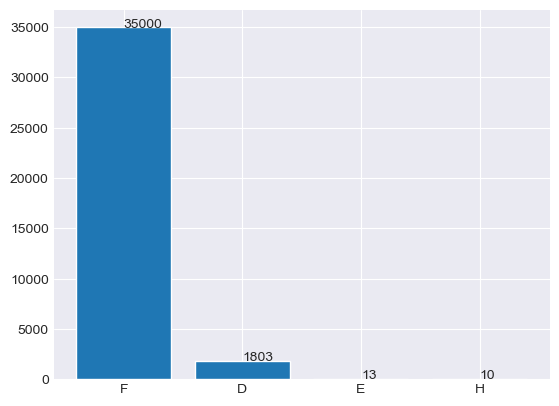

In [50]:
# функция добавляет подписи данных
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# Посмотрим график распределения видов топлива
fuel = df['fuel_type'].value_counts()
x = fuel.index
y = fuel.values
        
plt.bar(x, y)
addlabels(x, y)   
plt.show()

In [51]:
# топ моделей с пропусками в разбивке по видам топлива
df[df.model.isin(df[df.fuel_type.isna()].model.value_counts().nlargest(20).index.tolist())].\
groupby('model')['fuel_type'].value_counts()

model     fuel_type
3302      F            870
          D              1
3741      F             37
Duster    F             57
HD 78     D              8
HFF6850G  D            167
N120      D             60
          F             29
Next      F            303
          D             43
Polo      F            517
S3        F            907
S5        F            285
          D              4
Sandero   F              6
Name: count, dtype: int64

По большей части двигатели у автомобилей работают на бензине, можно заполнить пропуски этим значением.

In [52]:
df.fuel_type.fillna('F', inplace = True)

### Объём двигателя

In [53]:
# выведем топ-15 моделей с наибольшим кол-вом пропусков в объеме двигателя
df[df.engine_volume.isna()].model.value_counts().nlargest(15)

model
Duster      650
Sandero     435
Nexia R3    361
Logan       320
65115       259
Kaptur      230
43118       188
S3          175
3302        127
S5          117
6520         74
Next         71
NMR          68
45143        62
Arkana       55
Name: count, dtype: int64

In [54]:
# Сохраним в отдельный список топ моделей по пропускам
engine_nans = df[df.engine_volume.isna()].model.value_counts().nlargest(15).index.tolist()

# смотрим наиболее частые значения объема двигателей у этих моделей
top_engine_volume = df[df.model.isin(engine_nans)].groupby('model')['engine_volume'].value_counts()
top_engine_volume

model     engine_volume
3302      2.70              866
          2.80                3
          4.30                2
Duster    2.00               42
          1.60               15
NMR       3.00               16
          8.70                5
Nexia R3  1.50             1202
          1.49              136
Next      2.70              302
          2.80               30
          4.30               14
S3        1.60             1109
          1.50                2
S5        2.00              330
Sandero   1.60                6
Name: count, dtype: int64

Из этого списка можем заполнить объём двигателя модой для следующих моделей: 3302, Nexia R3, Next, S3, S5.

In [55]:
mask = ['3302', 'Nexia R3', 'Next', 'S3', 'S5']

# функция для заполнения пропусков в объёме двигателя модой
def fill_na_engine_volume(data):
    for i in range(len(mask)):
        col = data.engine_volume[data.model == mask[i]]
        data.engine_volume[data.model == mask[i]] = col.fillna(col.mode()[0])
    return data

fill_na_engine_volume(df)

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
0,2019-05-01,Mercur Auto,Audi,A3,TFSI,2018,DEU,F,1.40,AT,FWD,ФЛ,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс
1,2019-08-01,Mercur Auto,Audi,A3,TFSI,2018,DEU,F,1.40,AT,FWD,ЮЛ,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс
2,2019-04-01,Mercur Auto,Audi,A4,TFSI,2018,DEU,F,1.40,AT,FWD,ФЛ,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс
3,2019-07-01,Mercur Auto,Audi,A4,TFSI,2018,DEU,F,1.40,AT,FWD,ЮЛ,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс
4,2019-07-01,Mercur Auto,Audi,A4,TFSI,2018,DEU,F,1.40,AT,FWD,ФЛ,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39962,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39963,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39964,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики


In [56]:
(df[(df.brand == 'Renault')].isna().mean()).sort_values(ascending=False)

transmission_type   0.97
drive_type          0.96
engine_volume       0.96
client_type         0.23
segment_2013        0.00
state               0.00
sell_price_usd      0.00
price_usd           0.00
quantity            0.00
month               0.00
company             0.00
fuel_type           0.00
country             0.00
release_year        0.00
modification        0.00
model               0.00
brand               0.00
class_2013          0.00
dtype: float64

In [57]:
(df[(df.brand == 'KAMAZ')].isna().mean()).sort_values(ascending=False)

engine_volume       1.00
drive_type          0.94
month               0.00
segment_2013        0.00
state               0.00
sell_price_usd      0.00
price_usd           0.00
quantity            0.00
client_type         0.00
transmission_type   0.00
company             0.00
fuel_type           0.00
country             0.00
release_year        0.00
modification        0.00
model               0.00
brand               0.00
class_2013          0.00
dtype: float64

Из представленных таблиц видно, что набольшее количество пропусков имеется в моделях марки Renault, на втором месте KAMAZ. У этих марок в столбцах с объёмом двигателя и типом привода отсутствуют почти все данные, у Рено та же ситуация и со столбцом типа кпп.  
По данным с сайта drom.ru у разных моделей этих марок имеются разные объёмы двигателя: у Рено объём двигателя обычно в диапазоне от 1.4л до 2л, у Камаза от 4.5 до 11.8л.  
Можем заменить пропуски у Рено значением 1.6л, это не сильно исказит данные, т.к. всё равно далее будем делить на сегменты.  
Что касается Камаза и остальных марок, самостоятельно восстановить такое кол-во пропусков не представляется возможным. 

In [58]:
df.engine_volume[df.brand == 'Renault'] = df.engine_volume[df.brand == 'Renault'].fillna(1.6)

In [59]:
# Заполним оставшиеся пропуски в столбце engine_volume средним значением в разрезе класса
df['engine_volume'] = df.groupby('class_2013')['engine_volume'].transform(lambda x: x.fillna(x.mean()))

### Коробка передач

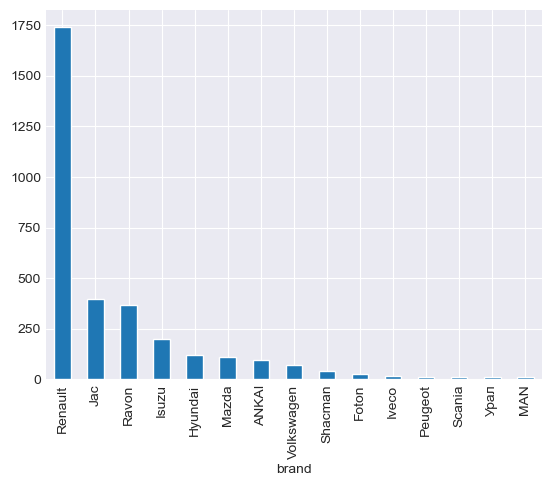

In [60]:
# выведем график топ-15 марок по числу пропусков в типе КПП
df[df.transmission_type.isna()].brand.value_counts().nlargest(15).plot(kind='bar')
plt.show()

Как и в случае с объёмом двигателя, в поле коробки передач больше всего пропусков у марки Рено.

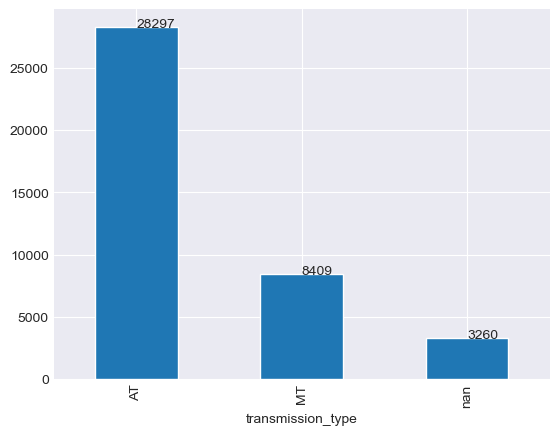

In [61]:
# график распределения машин по типам КПП
transmission = df.transmission_type.value_counts(dropna=False)

transmission.plot(kind='bar')
addlabels(transmission.index,transmission.values)  
plt.show()

В данных явно преобладают машины с автоматической коробкой. У разных марок в зависимости от комплектации могут быть разные типы КПП. Заполним пропуски значением "unknown".

In [62]:
df.transmission_type.fillna('unknown', inplace = True)

### Тип привода

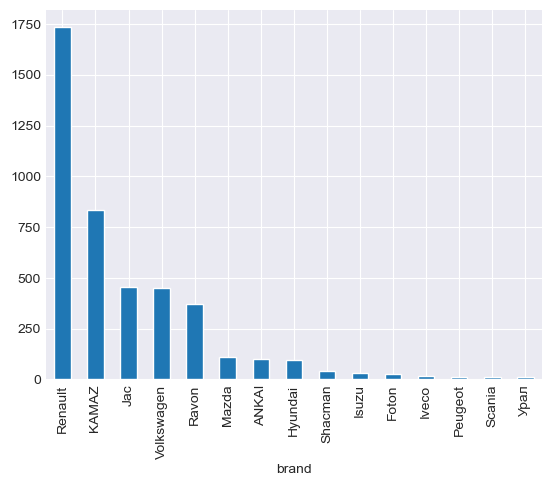

In [63]:
# выведем график топ-15 марок по числу пропусков в типе КПП
df[df.drive_type.isna()].brand.value_counts().nlargest(15).plot(kind='bar')
plt.show()

Для типа привода ситуация аналогичная. Можем сделать вывод, что компания-агрегатор плохо собирает данные по Рено и Камазу, либо детальная статистика по этим маркам отсутствует.

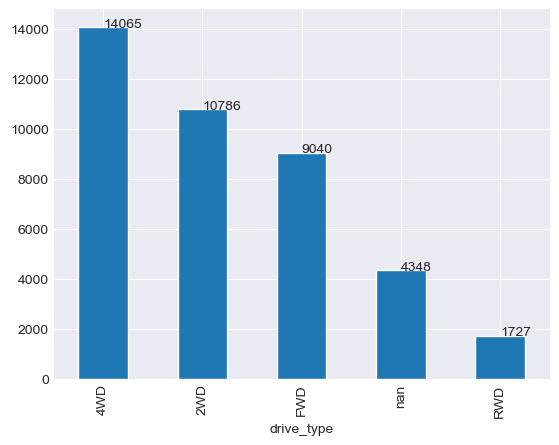

In [64]:
drive = df.drive_type.value_counts(dropna=False)

drive.plot(kind='bar')
addlabels(drive.index,drive.values)  
plt.show()

In [65]:
# Самостоятельно восстановить данные затруднительно, можем все пропуски отнести к категории 2WD, как "остальное"
df.drive_type.fillna('2WD', inplace = True)

### Тип клиента

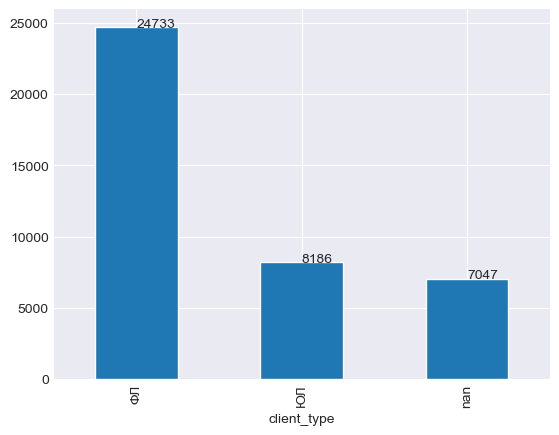

In [66]:
clients = df.client_type.value_counts(dropna=False)

clients.plot(kind='bar')
addlabels(clients.index,clients.values)  
plt.show()

Относительно пропусков в типе клиента заполним их, основываясь на допущениях:
- ФЛ покупают за раз не более двух машин,
- если машины относится к коммерческим, то её приобрело юр.лицо

In [67]:
# выделим диапазон значений для физ.лиц
individual = df.query('quantity <= 2  & client_type.isna() & segment_2013 != "Коммерческие автомобили"')

# заполним пропуски ФЛ
df.client_type.loc[individual.index] = df.client_type.loc[individual.index].fillna('ФЛ')

In [68]:
# Остальные пропуски заполним ЮЛ
df.client_type.fillna('ЮЛ', inplace = True)

In [69]:
df.client_type.unique()

array(['ФЛ', 'ЮЛ'], dtype=object)

### Количество

In [70]:
df[df.quantity.isna() == True]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
16741,2019-08-01,БИПЭК АВТО,Kia,Sportage,NaN,2019,KAZ,F,2.00,AT,4WD,ЮЛ,NaN,20700.00,0.00,Карагандинская область,Внедорожники,Компактные SUV
17368,2019-08-01,БИПЭК АВТО,Lada,Granta,NaN,2019,KAZ,F,1.60,AT,FWD,ЮЛ,NaN,7100.00,0.00,г.Алматы,Легковые автомобили,B класс
18676,2019-08-01,БИПЭК АВТО,Lada,XRAY,NaN,2018,KAZ,F,1.60,MT,FWD,ЮЛ,NaN,13800.00,0.00,Павлодарская область,Легковые автомобили,B класс
37416,2019-08-01,БИПЭК АВТО,UAZ,3909,NaN,2018,KAZ,F,2.69,MT,4WD,ЮЛ,NaN,11200.00,0.00,г.Алматы,Коммерческие автомобили,Развозные автомобили
37727,2019-08-01,БИПЭК АВТО,UAZ,Patriot,NaN,2018,KAZ,F,2.69,MT,4WD,ЮЛ,NaN,13800.00,0.00,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV
38775,2019-08-01,БИПЭК АВТО,Skoda,Kodiaq,NaN,2019,KAZ,F,2.00,AT,4WD,ЮЛ,NaN,40000.00,0.00,г.Нур-Султан,Внедорожники,Полноразмерные SUV


В столбце кол-во пропусков 6 штук, но также отсутствует информация об итоговой цене продажи. Данные не восстановить, можем удалить эти строки.

In [71]:
df.dropna(subset = ['quantity'], axis = 0, inplace = True)
df.reset_index(drop = True, inplace=True)

Разделим объем двигателя на категории: small [<1.2], average [1.2—1.8], big [1.8—3.5], huge [> 3.5]. 

In [72]:
df.engine_volume.min(), df.engine_volume.max() 

(1.2, 26.7)

In [74]:
volume_labels = ['small', 'average', 'big', 'huge']
# сохраним соответствия с словарь, чтобы легко было вспомнить
engine_volume_dict = {'small':'<1.2', 'average':'1.2-1.8', 'big':'1.8-3.5', 'huge':'>3.5'}
volume_bins = [0, 1.2, 1.8, 3.5, 26.7]

In [75]:
# создадим новые столбец с категориями 
df['volume_cat'] = pd.cut(df.engine_volume, bins=volume_bins, labels=volume_labels)

In [76]:
df.volume_cat.unique()

['average', 'big', 'huge', 'small']
Categories (4, object): ['small' < 'average' < 'big' < 'huge']

In [77]:
# проверим данные на дубликаты
df.duplicated().sum() / len(df)

0.5243993993993994

Из-за того, что предоставленные данные были обезличины, имеем большое количество явных дубликатов (52% записей). Обрабатывать их нет смысла.

In [78]:
# размерность очищенных данных
shape_clean = df.shape
print(f'После обработки осталось {shape_clean[0]} наблюдений и {shape_clean[1]} признаков.')
print(f'Удалили {shape_dirty[0] - shape_clean[0]} наблюдений и \
{shape_dirty[1] - shape_clean[1]} признаков.')

После обработки осталось 39960 наблюдений и 19 признаков.
Удалили 6 наблюдений и 6 признаков.


После очистки данных у нас осталось 19 столбцов, удалили всего 6 записей.

In [79]:
# сохраним файл с очищенными данными, далее будем пользоваться им
#df.to_csv('auto_kz_2019_clean.csv', sep=';')

## EDA

In [26]:
df = pd.read_csv('auto_kz_2019_clean.csv', sep=';', index_col=0)

In [27]:
df.month = pd.to_datetime(df.month)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39960 entries, 0 to 39959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              39960 non-null  datetime64[ns]
 1   company            39960 non-null  object        
 2   brand              39960 non-null  object        
 3   model              39960 non-null  object        
 4   modification       36375 non-null  object        
 5   release_year       39459 non-null  float64       
 6   country            39960 non-null  object        
 7   fuel_type          39960 non-null  object        
 8   engine_volume      39960 non-null  float64       
 9   transmission_type  39960 non-null  object        
 10  drive_type         39960 non-null  object        
 11  client_type        39960 non-null  object        
 12  quantity           39960 non-null  float64       
 13  price_usd          39960 non-null  float64       
 14  sell_price_

In [28]:
df.describe()

,month,release_year,engine_volume,quantity,price_usd,sell_price_usd
count,39960,39459.00,39960.00,39960.00,39960.00,39960.00
mean,2019-05-15 06:44:34.594594304,2018.75,2.38,1.35,28251.73,33762.74
min,2019-01-01 00:00:00,2011.00,1.20,-1.00,7100.00,-35588.25
25%,2019-03-01 00:00:00,2019.00,1.60,1.00,15518.50,16623.53
50%,2019-06-01 00:00:00,2019.00,2.00,1.00,24283.86,26248.96
75%,2019-08-01 00:00:00,2019.00,2.70,1.00,32505.66,35000.00
max,2019-09-01 00:00:00,2019.00,26.70,115.00,328510.97,3778206.26
std,NaN,0.46,1.18,2.37,20006.41,50704.57


Минимальный год выпуска авто - 2011, значит работаем с данными продаж, как новых автомобилей, так и подержанных.  
Минимум 75% всех автомобилей имеются объём двигателя не более 2.7л.  
В основном в Казахстане покупают по одной машине за раз, большие партии автомобилей редко встречаются.  
Средняя стомость автомобиля, составляет 28252 дол.США (или 1 млн 807 тыс.тенге, по курсу на сентябрь 2019).

In [29]:
# В столбце числа продаж имеется отрицательное значение, скорее всего это ошибка, исправим на 1.  
df[df.quantity == -1]
# домножим на -1 столбцы quantity и sell_price_usd
df.loc[df.quantity == -1, ['quantity', 'sell_price_usd']] *= -1

In [30]:
# переведём часть столбцов в категории
cat_col = ['fuel_type', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013', 'volume_cat']

for col in cat_col:
        df[col] = df[col].astype('category')

### Инфо о дилерах

In [31]:
# оценим на кол-во основных игроков на рынке, кол-во марок автомобилей
df.company.nunique(), df.brand.nunique()

(33, 44)

In [32]:
# оценим кол-во марок, которые производятся в самой стране
df[df.country == 'KAZ'].brand.nunique()

20

In [33]:
# посмотрим на распределение кол-ва марок по дилерам
df.groupby('company')['brand'].nunique().sort_values(ascending=False)

company
Allur Auto                      7
БИПЭК АВТО                      5
СемАЗ                           4
Mercur Auto                     3
Вираж                           3
TERRA MOTORS                    2
Almaty Motors Premium           2
Автоцентр-Бавария               2
Nissan Manufacturing RUS        2
Astana Motors                   2
СВС-ТРАНС                       2
Eurasia Motor Premium           2
ТК КАМАЗ                        2
Toyota Motor Kazakhstan         2
Volkswagen Group Rus            1
ТОО "Eurasia Motor Zhaik"       1
Лифан Моторс Рус                1
Автомир-Центр                   1
Автомир ГК                      1
Автодом Motors KST              1
Scania Central Asia             1
Subaru Kazakhstan               1
Scandinavian Motors             1
Renault Россия                  1
Ravon Motors Kazakstan          1
MMC RUS                         1
MAN Truck & Bus Kazakhstan      1
Hyundai Com Trans Kazakhstan    1
Hino Motors                     1
Daewoo

In [34]:
# найдём информацию о самой крупной продаже по кол-ву машин
df.loc[df.quantity == df.quantity.max()]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,volume_cat
16884,2019-05-01,БИПЭК АВТО,Lada,4x4,NaN,2019.00,KAZ,F,1.69,MT,4WD,ЮЛ,115.00,9000.00,1035000.00,Жамбылская область,Внедорожники,Субкомпактные SUV,average


In [35]:
# найдём информацию о самой крупной сделке
df.loc[df.sell_price_usd == df.sell_price_usd.max()]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,volume_cat
39555,2019-07-01,Daewoo Bus Kazakhstan,Daewoo,BC 095,BC 095,2019.00,KAZ,D,2.50,MT,2WD,ЮЛ,50.00,75564.13,3778206.26,Восточно-Казахстанская область,Коммерческие автомобили,Большие автобусы,big


Всего на территории Казахстана работают 33 дилерских центра. На рынке предсталены 44 марки автомобилей, из них 20 марок произведены непосредственно в Казахстане.  
Больше всего марок представлено у компаний Allur Auto - 7 и БИПЭК АВТО - 5, около половины всех дилеров продают только одну марку машин.  
Самый большой заказ выполнил автоцентр БИПЭК АВТО - 155 машин Лада 4х4 в Жабыльской области.  
Самый дорогой заказ был выполнен Daewoo Bus Kazakhstan: поставили 50 автобусов Daewoo BC 095 в Восточно-Казахстанскую область, сумма сделки - 3778206,26 дол. США.  

### Выбросы по объёму двигателя

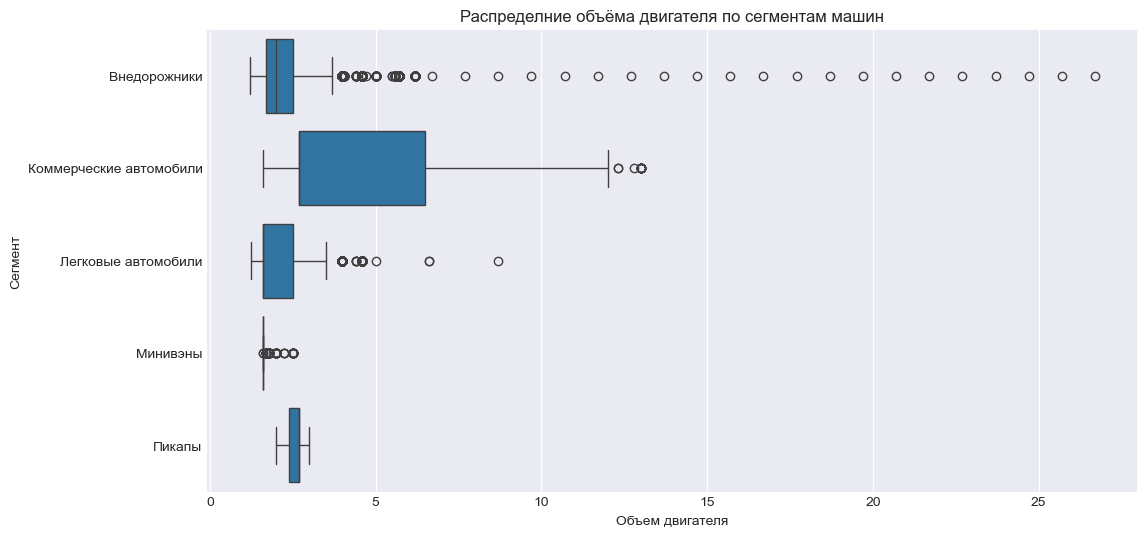

In [36]:
# Оценим распределение объёмов двигателей в разрезе сегментов

plt.figure(1, figsize=(12,6))
ax = sns.boxplot(data=df, x="engine_volume", y="segment_2013")
ax.set(title = 'Распределние объёма двигателя по сегментам машин', xlabel='Объем двигателя', ylabel='Сегмент')

plt.show()

На представленном графике видим, что у внедорожников имеются выбросы - двигатели свыше 4 литров, медианой для них является значение в районе 2л. Также есть выбросы у легковых машин: некоторые значения превышают 5 литров. У коммерческих автомобилей ситуация другая: есть очень низкие для этого сегмента литраж. Это может говорить об ошибках в данных.

У Chevrolet	Niva объём двигателя 1.7л (https://www.drom.ru/catalog/chevrolet/niva/g_2009_1658/), исправим это.

In [37]:
df.loc[(df.segment_2013 == "Внедорожники") & 
       (df.brand == "Chevrolet") & 
       (df.model == "Niva") & 
       (df.engine_volume != 1.7), 'engine_volume'] = 1.7

In [38]:
x = df.query('segment_2013 == "Внедорожники" &\
             engine_volume > 2  & engine_volume < 7').\
            groupby(['brand', 'model'])['engine_volume']
x.value_counts()

# Остальные модели выглядят нормально

brand       model    engine_volume
Audi        Q7       3.00              3
            Q8       3.00             20
BMW         X5       3.00             39
                     4.40              6
            X6       3.00             16
                                      ..
Volkswagen  Tiguan   2.03             26
            Touareg  3.00              4
                     2.73              3
Volvo       XC60     2.73              1
            XC90     4.06              1
Name: count, Length: 78, dtype: int64

In [39]:
# Также проверим легковые автомобили
df.query('segment_2013 == "Легковые автомобили"').engine_volume.min(), df.query('segment_2013 == "Легковые автомобили"').engine_volume.max() 

(1.248, 8.7)

In [40]:
x = df.query('segment_2013 == "Легковые автомобили" & engine_volume > 3').sort_values(by='engine_volume', ascending=False)
x.groupby(['brand', 'model'])['engine_volume'].value_counts()

brand          model      engine_volume
BMW            5 серия    4.40               2
               7 серия    6.60               2
                          4.40               1
               8 серия    4.40               1
Jaguar         XF         5.00               1
               XJ         3.49               1
Kia            Quoris     3.34               2
               Stinger    3.34               5
Lexus          ES         3.50              41
               LS         3.50              10
Mercedes-Benz  CLS-Class  4.00               2
               E-Class    4.00               2
               S-Class    4.00               3
Porsche        Panamera   4.00               3
Toyota         Camry      3.50             330
                          4.60              97
               Corolla    4.00             131
Volkswagen     Polo       8.70               1
Name: count, dtype: int64

Бросаются в глаза Тойта Камри 4.6л (максимум 3.5л), Королла 4л (максимум 1.8л) и Фольксваген Поло (максимум 1.6)

In [41]:
# Camry
df.loc[(df.segment_2013 == "Легковые автомобили") & (df.brand == "Toyota") & 
       (df.model == "Camry") & (df.engine_volume == 4.60), 'engine_volume'] = 3.5

#Corolla
df.loc[(df.segment_2013 == "Легковые автомобили") & (df.brand == "Toyota") & 
       (df.model == "Corolla") & (df.engine_volume == 4.00), 'engine_volume'] = 1.6

#Polo
df.loc[(df.segment_2013 == "Легковые автомобили") & (df.brand == "Volkswagen") & 
       (df.model == "Polo") & (df.engine_volume == 8.70), 'engine_volume'] = 1.6

In [42]:
# аналогично проверим коммерческие автомобили
print(df.query('segment_2013 == "Коммерческие автомобили"').engine_volume.min()) 
print(df.query('segment_2013 == "Коммерческие автомобили"').engine_volume.max())
# смущают слишком низкие значения

1.6
13.0


In [43]:
x = df.query('segment_2013 == "Коммерческие автомобили" & engine_volume < 4').sort_values(by='engine_volume')
x.groupby(['brand', 'model'])['engine_volume'].value_counts()

brand       model               engine_volume
Daewoo      BC 095              2.50              2
            BC 211 MA           2.50              1
            BS 106 A            2.50              5
            BS 106 D            2.50              2
Foton       BJ1069VDJEA-F1      2.84             19
                                                 ..
Volkswagen  Caddy Kasten        1.60              4
            Transporter Kasten  2.00             10
                                2.65              1
            Transporter Kombi   2.00              4
Урал        4320                2.84              7
Name: count, Length: 68, dtype: int64

У Daewoo - объем двигателя 7.6 - 11.1 л, , у KAMAZ 65111 - 11.76. Остальные модели в порядке.

In [44]:
df.loc[(df.brand == 'Daewoo') & (df.segment_2013 == "Коммерческие автомобили"), 'engine_volume'] = 7.6

df.loc[(df.brand == 'KAMAZ') & (df.segment_2013 == "Коммерческие автомобили") & 
       (df.engine_volume == 2.84), 'engine_volume'] = 11.76

### Локализация

In [45]:
# оценим распределение машин по странам-производителям
sales_by_country = df.groupby('country')[['quantity', 'sell_price_usd']].sum().reset_index()
sales_by_country.sort_values(by='quantity', ascending=False)

,country,quantity,sell_price_usd
8,KAZ,31367.00,569024857.09
12,RUS,14341.00,357192265.30
7,JPN,4612.00,255472253.15
15,TUR,1167.00,36631607.10
14,THA,981.00,31203618.60
17,USA,507.00,35348056.44
4,DEU,357.00,25961018.31
16,UK,206.00,18396273.93
3,CHN,94.00,2069946.58
18,UZB,83.00,2082834.78


Среди всех продаж лидируют машины со сборкой в Казахстане, затем следует Россия, на третьем месте - японские машины.

In [46]:
# оценим продажи по месту их осуществления
sales_by_state = df.groupby('state')[['quantity', 'sell_price_usd']].sum().reset_index()
sales_by_state.sort_values(by='quantity', ascending=False)

,state,quantity,sell_price_usd
16,г.Алматы,13947.00,426474005.34
17,г.Нур-Султан,10158.00,292675683.31
15,Южно-Казахстанская область,3749.00,81816963.53
3,Атырауская область,3395.00,74717533.10
8,Костанайская область,3305.00,88334490.44
7,Карагандинская область,2983.00,59959740.56
4,Восточно-Казахстанская область,2944.00,60444536.70
6,Западно-Казахстанская область,2180.00,45829901.28
10,Мангистауская область,2049.00,46727491.50
14,Экспорт область,1919.00,37882052.45


Больше всего продаж приходится на два крупнейших города: Алматы и Астану(44%).  
На десятом месте по продажам - экспортные сделки: по итогам 1919 сделок машины были вывезены зарубеж.  
Сравним продажи по регионам со средней зп в этих регионах.

In [47]:
# данные о средней зарплате по регионам на 3 кв 2019: 
# https://stat.gov.kz/ru/search/index.php?q=%D0%B7%D0%B0%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BD%D0%B0%D1%8F+%D0%BF%D0%BB%D0%B0%D1%82%D0%B0&s=&PAGEN_1=4
salary_dict = {
    'г.Алматы': 218005, 
    'г.Нур-Султан': 282602, 
    'Восточно-Казахстанская область': 152179,
    'Западно-Казахстанская область': 177641, 
    'Костанайская область': 140309,
    'Павлодарская область': 154713, 
    'Южно-Казахстанская область': 110254,
    'Мангистауская область': 282888, 
    'Атырауская область': 336502,
    'Актюбинская область': 153002, 
    'Карагандинская область': 166316,
    'Северо-Казахстанская область': 126181, 
    'Акмолинская область': 135065,
    'Кызылординская область': 147496, 
    'Жамбылская область': 121859,
    'Туркестанская область': 119741, 
    'Алматинская область': 130916
}

kz_salary_2019 = pd.DataFrame(salary_dict.items(), columns =['state', 'salary'])

<Figure size 1800x1200 with 0 Axes>

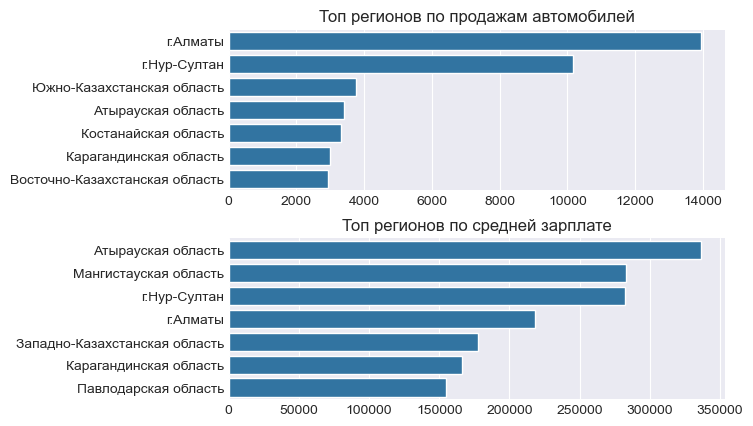

In [48]:
# объединим информацию в одну таблицу
kz_stat = sales_by_state.merge(kz_salary_2019, how='inner', left_on='state', right_on = 'state')

# построим графики
x1 = kz_stat.nlargest(7, 'quantity').quantity
y1 = kz_stat.nlargest(7, 'quantity').state

x2 = kz_stat.nlargest(7, 'salary').salary
y2 = kz_stat.nlargest(7, 'salary').state

plt.figure(2, figsize=(18,12))
fig, axs = plt.subplots(nrows = 2)

ax1 = sns.barplot(kz_stat, x=x1, y=y1, ax=axs[0])
ax1.set(title = 'Топ регионов по продажам автомобилей', xlabel='', ylabel='')
ax2 = sns.barplot(kz_stat, x=x2, y=y2, ax=axs[1])
ax2.set(title = 'Топ регионов по средней зарплате', xlabel='', ylabel='')

plt.subplots_adjust(hspace = 0.3)
plt.show()

Как видно из графиков выше, из топ-7 регионов 4 попадают в оба топа. При этом, не смотря на то что больше всего машин было куплено в Алмате и Астане, по уровню ЗП они занимают только 3 и 4 место. Можно предположить, что люди, которые работают в промышленно развитых регионах, приезжают в крупные города, где выбор автомобилей больше.

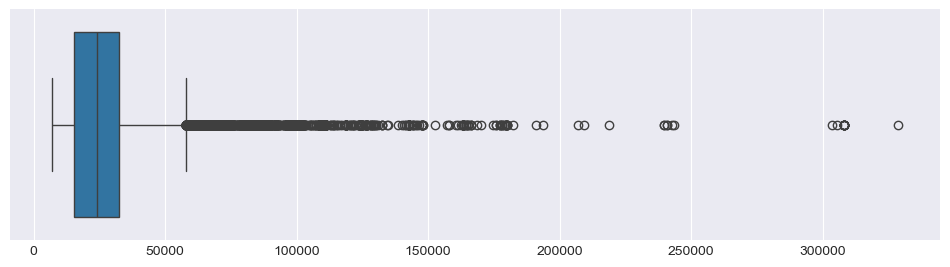

In [49]:
# пострим график распределения цен
plt.figure(2, figsize=(12,3))
ax = sns.boxplot(x = df.price_usd)
plt.xlabel('')
plt.show()

Видим, что основной диапазон цен находится в пределах от 15 и 35 тыс. дол. Цены свыше 60 тыс. можно считать выбросами. Это легко объясняется тем, что данные собраны по машинам разных сегментов и классов: автобусы в среднем стоят дороже обычных легковых машин, также есть информация о продаже премиальных марок.

### Категориальные признаки

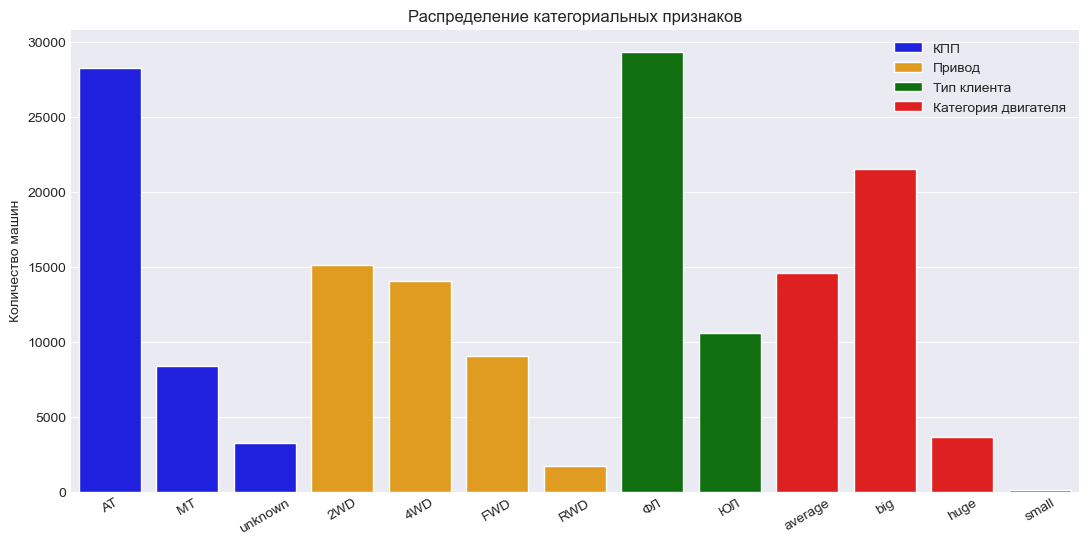

In [50]:
# посмотрим на распределения автомобилей по категориальным признакам
plt.figure(2, figsize=(13,6))

sns.barplot(df.transmission_type.value_counts(), color='blue', label='КПП')
sns.barplot(df.drive_type.value_counts(), color='orange', label='Привод')
sns.barplot(df.client_type.value_counts(), color='green', label='Тип клиента')
sns.barplot(df.volume_cat.value_counts(), color='red', label='Категория двигателя')

plt.title('Распределение категориальных признаков')
plt.xlabel('')
plt.ylabel('Количество машин')
plt.xticks(rotation=30)
plt.legend()
plt.show()

## Исследование рынка автомобилей Казахстана

### Ёмкость рынка

По данным заказчика, в 4м квартале в среднем осуществляется от 30 до 50% всех продаж автомобилей. Можем рассчитать потенциальную ёмкость рынка за весь 2019 год. Возьмём продажи по верхн

In [51]:
# посмотрим на ёмкость рынка с учётом 40% прироста в 4 квартале
market_volume_total = int((df.quantity.sum()).round())
market_volume_total_usd = (df.sell_price_usd.sum()).round(2)

print(f"Фактическая ёмкость рынка за 9 месяцев 2019 года \
составляет {market_volume_total} единиц, общая выручка — {(market_volume_total_usd / 1000000).round(2)} млн.дол.")
print(f"Потенциальная ёмкость рынка в 2019 году составит \
{int(market_volume_total*1.4)} штук, потенциальная выручка — {(market_volume_total_usd * 1.4 / 1000000).round(2)} млн.дол.")

Фактическая ёмкость рынка за 9 месяцев 2019 года составляет 53876 единиц, общая выручка — 1349.23 млн.дол.
Потенциальная ёмкость рынка в 2019 году составит 75426 штук, потенциальная выручка — 1888.92 млн.дол.


### Лидеры рынка

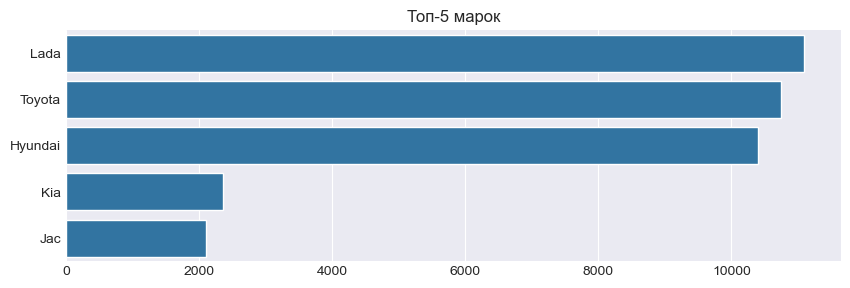

In [52]:
# выведем топ марок по объёму продаж и сумме
top_5_brands = df.groupby('brand')[['quantity', 'sell_price_usd']].sum().nlargest(5, 'quantity')
top_5_brands
# построим график

plt.figure(figsize=(10,3))

ax = sns.barplot(y = top_5_brands.index, x = top_5_brands.quantity)
ax.set(title = 'Топ-5 марок', xlabel='', ylabel='')

plt.show()

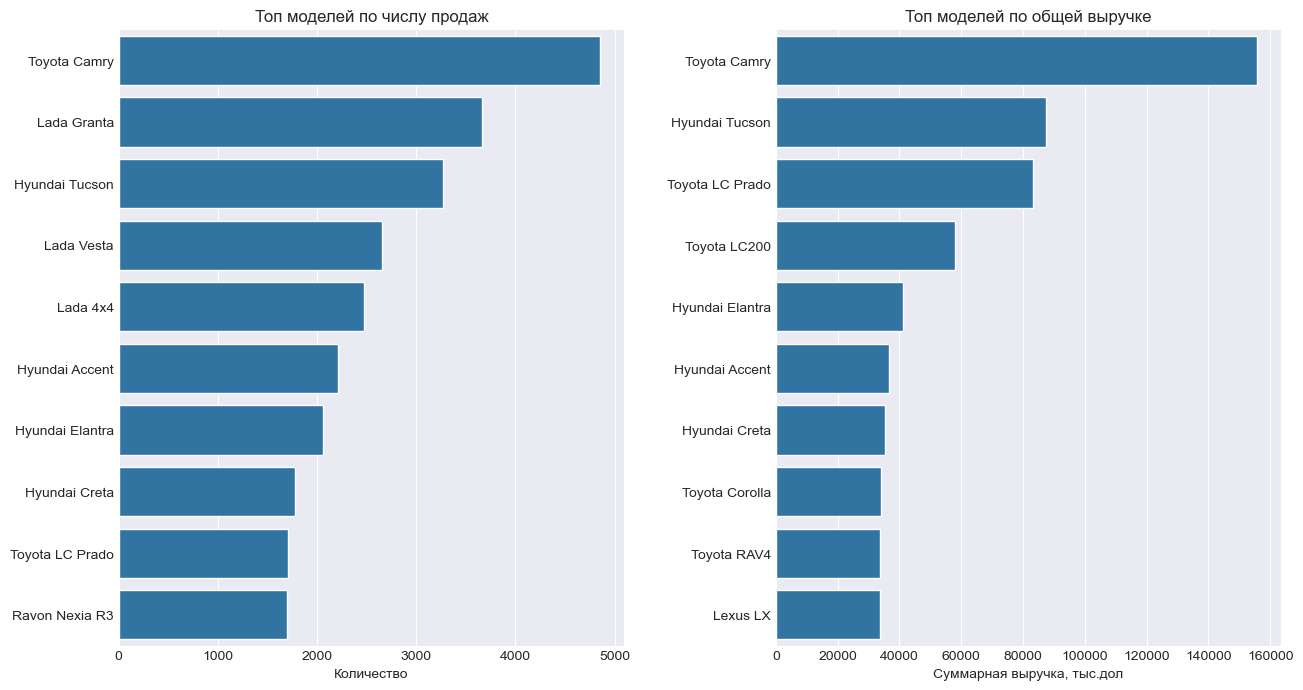

In [53]:
# выведем топ моделей 
df['full_names'] = df.brand +' '+ df.model
top_10_models = df.groupby('full_names')[['quantity', 'sell_price_usd']].sum()
# поменяем выручку на тыс.дол
top_10_models['sell_price_usd'] = (top_10_models['sell_price_usd']/1000).round(2)

# построим график
x1 = top_10_models.sort_values(by='quantity', ascending=False).quantity[:10]
x2 = top_10_models.sort_values(by='sell_price_usd', ascending=False).sell_price_usd[:10]

fig, axs = plt.subplots(ncols = 2 , figsize=(15,8))

ax1 = sns.barplot(x = x1, y = x1.index, ax=axs[0])
ax1.set(title = 'Топ моделей по числу продаж', xlabel='Количество', ylabel='')
ax2 = sns.barplot(x = x2, y = x2.index, ax=axs[1])
ax2.set(title = 'Топ моделей по общей выручке', xlabel='Суммарная выручка, тыс.дол', ylabel='')

plt.subplots_adjust(wspace = 0.3)
plt.show()

В топ-5 моделей по числу продаж попали три модели Лады, при этом выручка по ним не попадает и в топ-10. По выруке больше всего принесли продажи Тойоты и Хёнде.

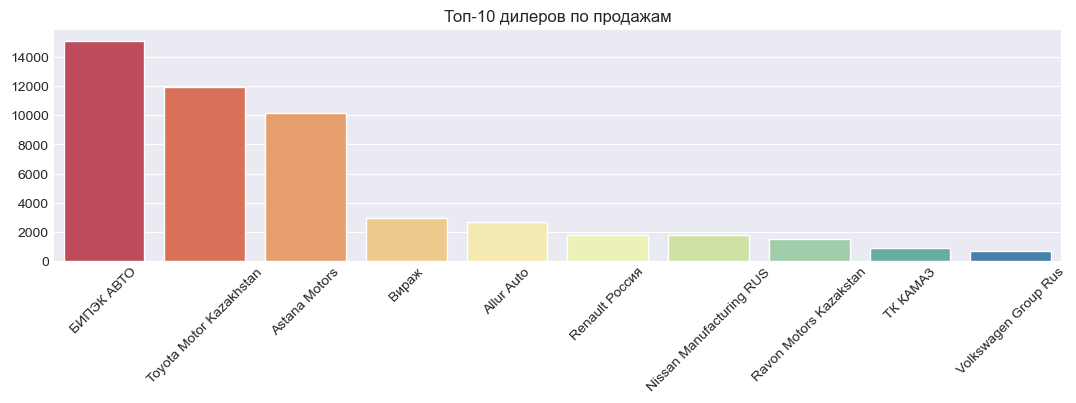

In [54]:
# продажи автоцентров
company_sales = df.groupby('company')['quantity'].sum().nlargest(10)
# график
plt.figure(figsize=(13,3))

sns.barplot(company_sales, palette="Spectral")
plt.xticks(rotation=45)
plt.title('Топ-10 дилеров по продажам')
plt.xlabel('')
plt.ylabel('')

plt.show()

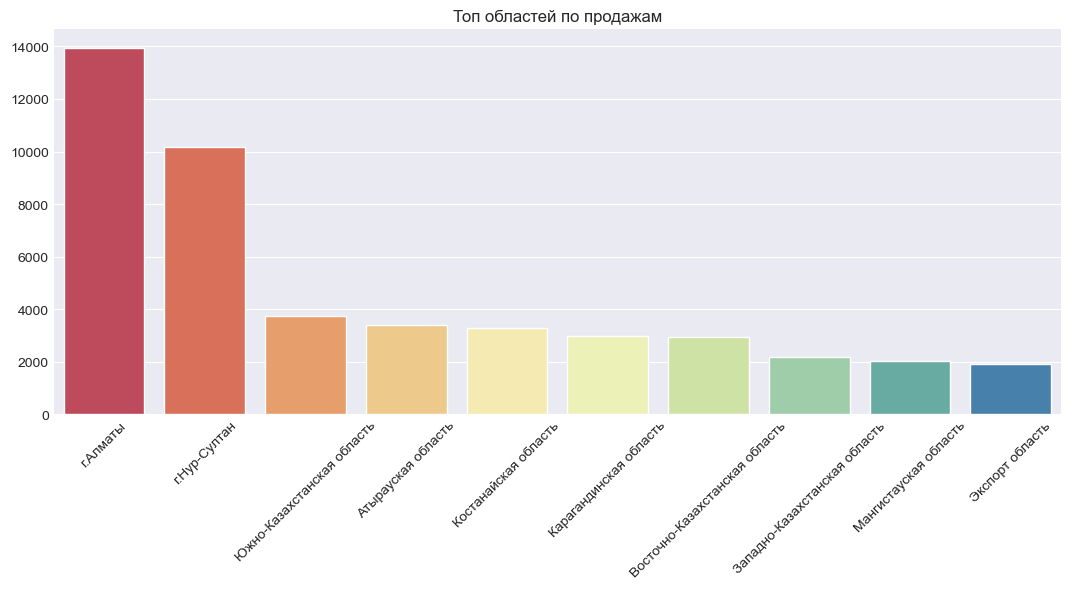

In [55]:
# продажи по регионам
sales_by_state = df.groupby('state')['quantity'].sum().nlargest(10)

# график
plt.figure(figsize=(13,5))

sns.barplot(sales_by_state, palette="Spectral")
plt.xticks(rotation=45)
plt.title('Топ областей по продажам')
plt.xlabel('')
plt.ylabel('')

plt.show()

### Анализ сегментов

In [56]:
# посмотрим на рынок в разрезе коммерческих и некоммерческих машин
ind_cars = df[df.segment_2013 != "Коммерческие автомобили"]
com_cars = df[df.segment_2013 == "Коммерческие автомобили" ]
# выручка по коммерческим т.с. в тыс.дол
com_revenue = (com_cars.sell_price_usd.sum()/1000)
# общая выручка
total_revenue = (df.sell_price_usd.sum()/1000)

print(f'За 9 месяцев 2019 года коммерческого транспорта было продано {int(com_cars.quantity.sum())} штук \
на {com_revenue.round(2)} тыс.дол, \
что составляет {int(com_revenue / total_revenue * 100)}% всего рынка.')

За 9 месяцев 2019 года коммерческого транспорта было продано 5246 штук на 185811.93 тыс.дол, что составляет 13% всего рынка.


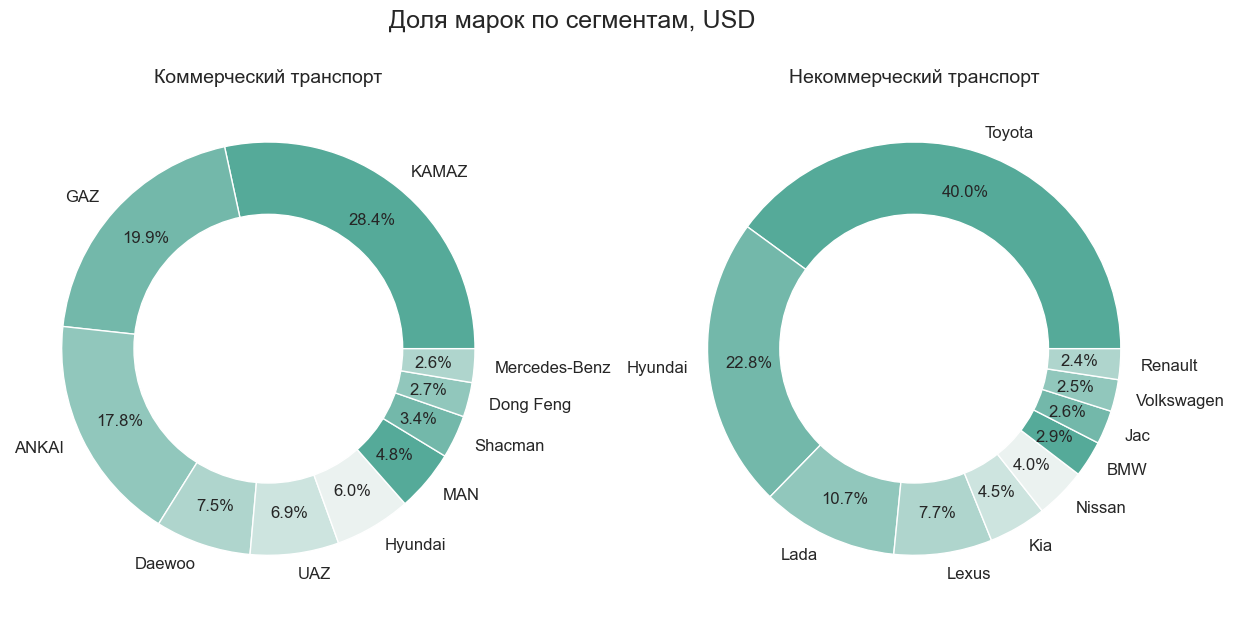

In [57]:
# построим график долей для топ-10 марок по этим сегментам
# коммерческий транспорт
pie_com = (com_cars.groupby('brand')['sell_price_usd'].sum().sort_values(ascending=False)
            .reset_index()
            .nlargest(10, 'sell_price_usd'))

sizes_com = pie_com.sell_price_usd.tolist()
labels_com = pie_com.brand.tolist()

# остальной
pie_ind = (ind_cars.groupby('brand')['sell_price_usd'].sum().sort_values(ascending=False)
            .reset_index()
            .nlargest(10, 'sell_price_usd'))

sizes_ind = pie_ind.sell_price_usd.tolist()
labels_ind = pie_ind.brand.tolist()

# отрисовка графика
plt.figure(figsize=(15, 7))
plt.suptitle('Доля марок по сегментам, USD',fontsize=18)

# коммерческий транспорт
plt.subplot(1, 2, 1)
plt.title('Коммерческий транспорт', fontdict={"fontsize":14})
plt.pie(sizes_com, labels = labels_com, 
        autopct='%1.1f%%', 
        textprops={'fontsize':12}, 
        colors=sns.color_palette("light:#5A9_r"),
        pctdistance=0.80)
# заполним центр кругом
hole = plt.Circle((0,0), 0.65, color = 'white')
plt.gcf().gca().add_artist(hole)

# некоммерческий транспорт
plt.subplot(1, 2, 2)
plt.title('Некоммерческий транспорт', fontdict={"fontsize":14})
plt.pie(
    sizes_ind, labels = labels_ind, 
    autopct='%1.1f%%', 
    textprops={'fontsize':12}, 
    colors=sns.color_palette("light:#5A9_r"),
    pctdistance=0.80)
# заполним центр 
hole = plt.Circle((0,0), 0.65, color = 'white')
plt.gcf().gca().add_artist(hole)

plt.subplots_adjust(wspace = 0.25)

plt.show()

**Коммерческий танспорт:**
Основную долю рынка занимают: Камаз - 28.4%, Газ - 19.9% и Анкаи - 17.8%.
На этом рынка преобладают российские марки - 54%

**Потребительский сегмент:**
Среди некоммерческого транспорта наиболее популярны: Тойота - 40%, Хёндэ - 22.8% и Лада - 10.7%.  
Таким образом 80% всего рынка занимают 4 марки из 44-х представленных в Казахстане.  
Японские марки занимают 52% рынка.  

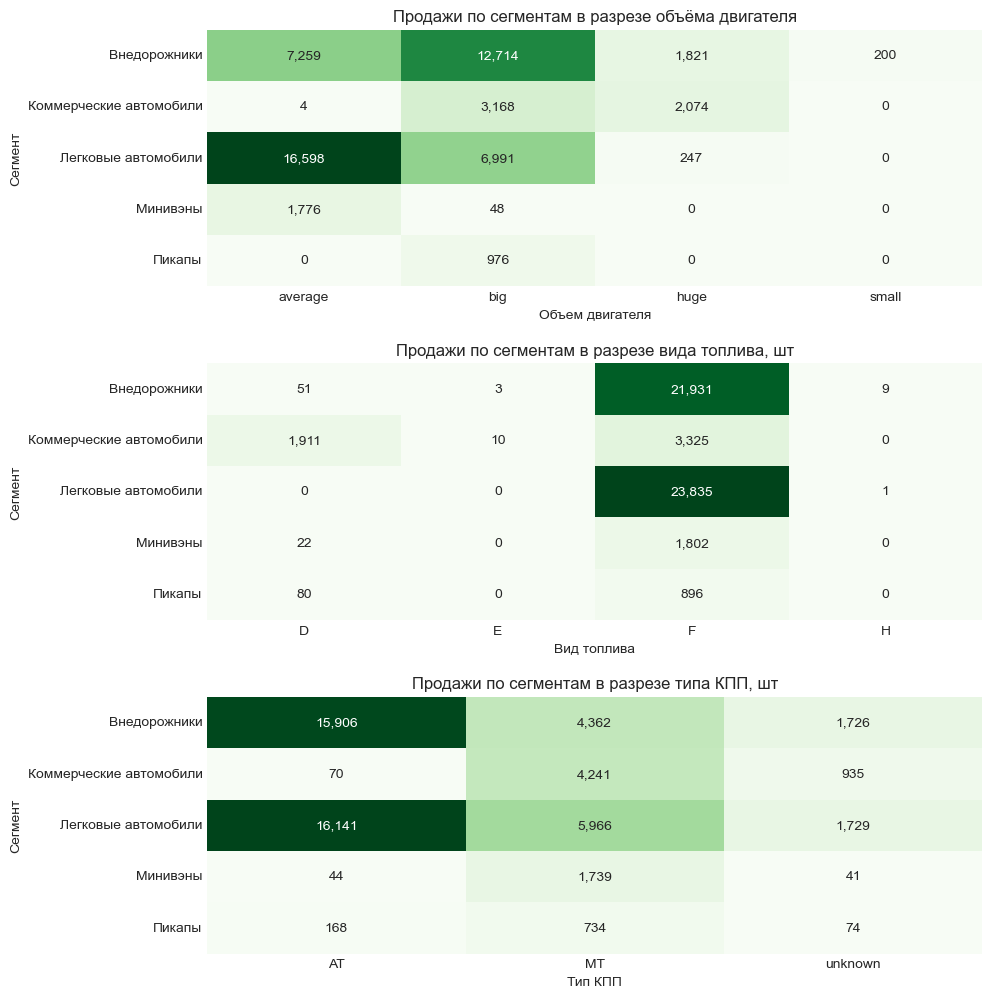

In [58]:
# продажи по сегментам в разрезе объема двигателя
seg_engine = pd.pivot_table(data = df, index = 'segment_2013', columns = 'volume_cat', values = 'quantity', aggfunc='sum')
# продажи по сегментам в разрезе видов топлива
seg_fuel = pd.pivot_table(data = df, index = 'segment_2013', columns = 'fuel_type', values = 'quantity', aggfunc='sum')
# продажи по сегментам в разрезе типа КПП
seg_transmission = pd.pivot_table(data = df, index = 'segment_2013',\
                                  columns = 'transmission_type', values = 'quantity', aggfunc='sum')

#график
fig, axes = plt.subplots(nrows=3, figsize=(10, 12))

ax1 = sns.heatmap(seg_engine, annot=True, fmt=',.0f', cbar=False,cmap='Greens', ax=axes[0])
ax1.set(title = 'Продажи по сегментам в разрезе объёма двигателя', xlabel='Объем двигателя', ylabel='Сегмент')
ax2 = sns.heatmap(seg_fuel, annot=True, fmt=',.0f', cbar=False,cmap='Greens', ax=axes[1])
ax2.set(title = 'Продажи по сегментам в разрезе вида топлива, шт', xlabel='Вид топлива', ylabel='Сегмент')
ax3 = sns.heatmap(seg_transmission, annot=True, fmt=',.0f', cbar=False,cmap='Greens', ax=axes[2])
ax3.set(title = 'Продажи по сегментам в разрезе типа КПП, шт', xlabel='Тип КПП', ylabel='Сегмент')

plt.subplots_adjust(hspace = 0.3)

plt.show()

Анализируя графики в разрезе сегментов, можем обрисовать портрет самых популярных машин. Это легковая машина или внедорожник, с автоматической коробкой передач, работающая на бензине, с объёмом двигателя от 1.2 до 1.8л для легковых машин, или от 1.8 до 3.5 для внедорожников.  
Малолитражные автомобили в целом не пользуются спросом. Рынок гибридных машин и электромобилей находится в зачаточном состоянии. 

### Динамика продаж

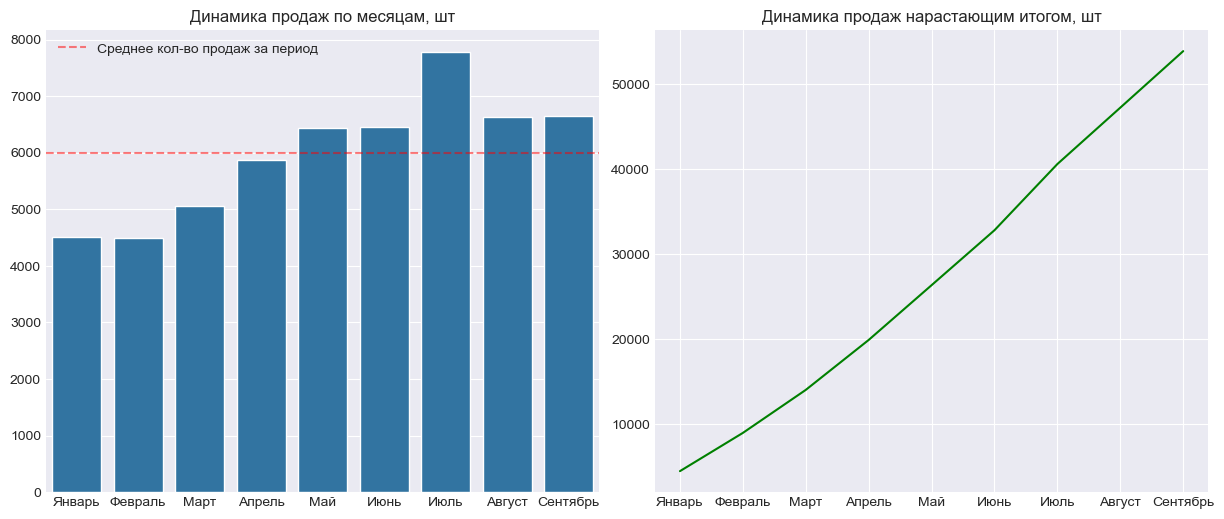

In [59]:
# Проанализируем общую динамику продаж по месяцам
monthly_sales = df.groupby('month')[['quantity', 'sell_price_usd']].sum().reset_index()
monthly_sales['quantity_cum'] = monthly_sales.quantity.cumsum()
monthly_sales['cumsum_usd'] = monthly_sales.sell_price_usd.cumsum()
#mean_value = monthly_sales.sell_price_usd.mean()
# построим графики
fig, axes = plt.subplots(ncols= 2, figsize=(15,6))


ax1 = sns.barplot(monthly_sales, x = monthly_sales.month.dt.month_name(locale='ru_Ru'), y = 'quantity', ax=axes[0])
ax1.axhline(monthly_sales.quantity.mean(), ls='--', alpha=0.5, color='r', label='Среднее кол-во продаж за период' )
ax1.set(title = 'Динамика продаж по месяцам, шт', xlabel='', ylabel='')
ax1.legend ()
ax2 = sns.lineplot(monthly_sales, x = monthly_sales.month.dt.month_name(locale='ru_Ru'), y = 'quantity_cum', c = 'g', ax=axes[1])
ax2.set(title = 'Динамика продаж нарастающим итогом, шт', xlabel='', ylabel='')

plt.subplots_adjust(wspace = 0.1)
plt.show()

За рассматриваемый период видим планомерный рост числа проданных машин, выделяется только июль, когда было продано больше всего машин, с августа объём продаж возвращается на уровень мая-июня.  
Попробуем определить за счёт чего в июле было значительно больше продаж.

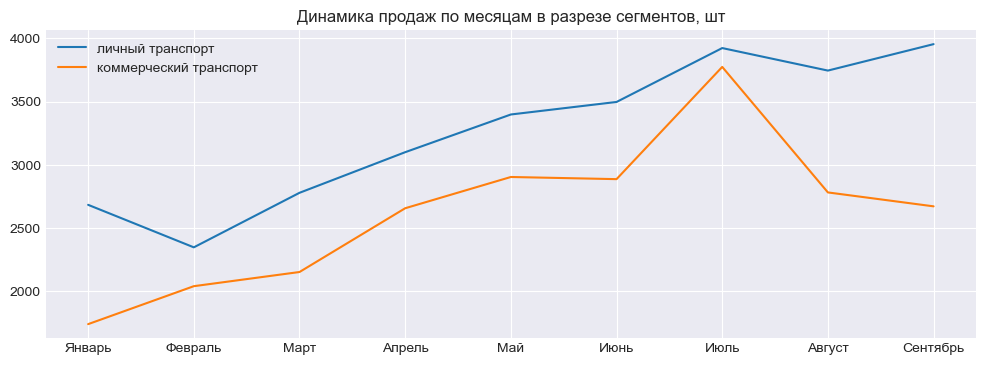

In [60]:
# Динамика в разрезе личного и коммерческого транспорта (личный - купленный ФЛ)
private_cars = df[(df.segment_2013 != 'Коммерческие автомобили') & (df.client_type == 'ФЛ')]\
                .groupby(['month'])['quantity'].sum().reset_index().sort_values(by = 'month')
commerce_cars = df[(df.client_type == 'ЮЛ')]\
                .groupby(['month'])['quantity'].sum().reset_index().sort_values(by = 'month')

# графики
plt.figure(figsize=(12, 4))

plt.plot(private_cars.month.dt.month_name(locale='ru_Ru'), private_cars.quantity, label='личный транспорт')
plt.plot(commerce_cars.month.dt.month_name(locale='ru_Ru'), commerce_cars.quantity, label='коммерческий транспорт')

plt.title('Динамика продаж по месяцам в разрезе сегментов, шт');
plt.ylabel('')
plt.xlabel('')
plt.legend()

plt.show()

Спрос на личный транспорт превышает коммерческий. В июле был резкий рост продаж коммерческого транспорта. Логично предположить, что коммерческий транспорт в большинстве своём продаётся оптовыми партиями. Видимо, в июле были выполены заказы на поставку больших партий автомобилей.

In [61]:
# определим самые крупные продажи по месяцам
display(df.groupby('month')['quantity'].nlargest(1).sort_values(ascending=False))
display(df.groupby('month')['sell_price_usd'].nlargest(1).sort_values(ascending=False))

month            
2019-05-01  16884   115.00
2019-07-01  25552   100.00
2019-06-01  38403    79.00
2019-03-01  13699    70.00
2019-08-01  16967    66.00
2019-04-01  16299    63.00
2019-09-01  38419    62.00
2019-01-01  17030    50.00
2019-02-01  17101    50.00
Name: quantity, dtype: float64

month            
2019-07-01  39555   3778206.26
2019-05-01  39547   3157811.64
2019-06-01  39554   2277367.68
2019-02-01  20211   1477016.35
2019-03-01  38705   1199777.77
2019-08-01  20355   1142558.75
2019-09-01  38419    977101.92
2019-04-01  16299    850500.00
2019-01-01  39434    774090.86
Name: sell_price_usd, dtype: float64

In [62]:
july_top_sale = df[df.month == '2019-07-01'][['company', 'brand', 'model'
                              ,'state', 'segment_2013'
                              ,'quantity', 'sell_price_usd']]
july_top_sale.groupby(['company', 'brand'])['quantity'].sum().sort_values(ascending=False)[:10]

company                   brand  
Toyota Motor Kazakhstan   Toyota    1447.00
БИПЭК АВТО                Lada      1417.00
Astana Motors             Hyundai   1384.00
Allur Auto                Jac        820.00
Ravon Motors Kazakstan    Ravon      325.00
БИПЭК АВТО                Kia        245.00
Renault Россия            Renault    244.00
ТК КАМАЗ                  KAMAZ      195.00
Nissan Manufacturing RUS  Nissan     192.00
БИПЭК АВТО                Skoda      168.00
Name: quantity, dtype: float64

По максимальному оптовому заказу лидирует май, когда было продано 115 машин, затем июль - 100 машин. Однако, июль занимает первое место по сумме заказа: было продано 50 автобусов Daewoo BC 095 на 3 млн 788 тыс. USD.  
Июль занимает первое место как по числу проданных машин, так и по сумме продаж. Лидерами по количеству продажи были Toyota Motor, БИПЭК АВТО и Astana Motors. Для первых двух компаний июль был самым результативным месяцем.

### (R)FM-анализ моделей авто

Проведём анализ моделей на частоту их приобретения и полученную выручку

| Показатель | Значение |
| :------------------- | :------------------- |
|M - сумма покупок|1 - маленькая<br/>2 - средняя<br/>3 - большая|
|F - частота покупки|1 - редко<br/>2 - нечасто<br/>3 - часто|

Наиболее интересными сегментами являются те, где значения F и M - 2 или 3.

In [66]:
rfm = df[['brand', 'model', 'quantity','sell_price_usd' ]].copy()
rfm['f_val'] = df.groupby('model')['quantity'].transform('sum')
rfm['m_val'] = df.groupby('model')['sell_price_usd'].transform('sum')

# # выделим сегменты
rfm['f']  = pd.qcut(rfm['f_val'], 3, labels = [1, 2, 3])
rfm['m']= pd.qcut(rfm['m_val'], 3, labels = [1, 2, 3])

rfm['fm'] = rfm['f'].astype('str') + rfm['m'].astype('str')

In [67]:
display(rfm[rfm.fm.isin(['22', '23', '32', '33'])].groupby('brand').model.unique().reset_index())

display(rfm[rfm.fm== '33'].groupby('brand').model.unique().reset_index())

,brand,model
0,Hyundai,"[Accent, Creta, Elantra, Tucson]"
1,Jac,[S3]
2,Lada,"[4x4, Granta, Largus, Vesta]"
3,Ravon,[Nexia R3]
4,Toyota,"[Camry, Corolla, HILUX DC, LC Prado, LC200, RAV4]"
5,Volkswagen,[Polo]


,brand,model
0,Hyundai,[Tucson]
1,Toyota,[Camry]


Как и в анализе рейтинга моделей по выручке, FM-анализ подтверждает, что самыми популярными и наиболее прибыльными являются Тойта и Хёндэ. Эти марки также представлены наибольшим числом моделей. Самыми популярнами машинами являются Hyundai Elantra и Tucson, Toyota Camry.

## Анализ положения Меркур Авто

### Общие показатели

Рассчитаем основные финансовые результаты Меркур Авто за рассматриваемый период

In [128]:
# выручка
mercur_revenue = df[df.company == 'Mercur Auto']['sell_price_usd'].sum()
# продажи
mercur_sales = df[df.company == 'Mercur Auto']['quantity'].sum()

mean_revenue = mercur_revenue / mercur_df.month.nunique()

print(f'За 9 месяцев дилер Меркур Авто продал {int(mercur_sales)} машин и заработал {mercur_revenue.round(2)} USD.\
\nСреднемесячная выручка составила {mean_revenue.round(2)} USD')

За 9 месяцев дилер Меркур Авто продал 650 машин и заработал 19355275.98 USD.
Среднемесячная выручка составила 2150586.22 USD


In [90]:
# продажи в разрезе марок
mercur_df = df[df.company == 'Mercur Auto'].copy()
display(mercur_df.brand.unique())
display(mercur_df.groupby(['brand', 'model']).agg(total_sales = ('quantity', 'sum'), revenue = ('sell_price_usd', 'sum')))

array(['Audi', 'Porsche', 'Volkswagen'], dtype=object)

total_sales    revenue
brand      model                                     
Audi       A3                         2.00   60361.99
           A4                         3.00   95858.00
           A6                         8.00  607692.51
           A7                         2.00  171100.00
           A8                         5.00  557799.21
           Q5                         8.00  433237.39
           Q7                         3.00  233073.00
           Q8                        20.00 1793118.33
           RS5                        1.00  107250.00
Porsche    911 Carrera S              1.00  162576.08
           Cayenne                   28.00 2856255.46
           Macan                     15.00 1015619.57
           Panamera                   8.00 1079061.59
Volkswagen Amarok                     2.00   73041.55
           Jetta                      3.00   53434.20
           Multivan                   3.00  211161.32
           Polo                     440.00 6418764.24
           Teramont                   4.00  216315.33
           Tiguan                    81.00 2642563.72
           Touareg                    3.00  242552.31
           Transporter                2.00   73029.08
           Transporter Kasten         7.00  214890.34
           Transporter Kombi          1.00   36520.77

Компания Меркур Авто продаёт 3 марки автомобилей: Audi, Porsche и Volkswagen, преобладающую долю занимает Фольксваген. В разрезе моделей чаще всего продавали Audi Q8, Porsche Cayenne (машины не дешёвого сегмента), Фолбксваген Поло и Тигуан.
Лидером продаж у дилера является Поло (продано 440 машин).  

In [179]:
# Посмотрим, какие марки машин приносили наибольшую прибыль
abc_columns = ['quantity', 'sell_price_usd']
mercur_abc = mercur_df[['full_names', 'quantity', 'sell_price_usd']].copy()

# напишем функцию для ABC-анализа
def abc_analyze(df, index):
    grouped = mercur_df.groupby(index).agg({col: sum for col in abc_columns})
    for col in abc_columns:
        grouped[f'rel_{col}'] = grouped[col] / sum(grouped[col])
        grouped = grouped.sort_values(f'rel_{col}', ascending=False)
        #display(grouped)
        grouped[f'cumsum_{col}'] = grouped[f'rel_{col}'].cumsum()
        #display(grouped)
        grouped[f'abc_{col}'] = np.where(grouped[f'cumsum_{col}'] <= 0.8, 'A', 
                                         np.where(grouped[f'cumsum_{col}'] <= 0.95, 'B', 'C'))
    return grouped[abc_columns + [f'abc_{col}' for col in abc_columns]]

abc_analyze(mercur_abc, 'full_names')

,quantity,sell_price_usd,abc_quantity,abc_sell_price_usd
full_names,,,,
Volkswagen Polo,440.00,6418764.24,A,A
Porsche Cayenne,28.00,2856255.46,B,A
Volkswagen Tiguan,81.00,2642563.72,B,A
Audi Q8,20.00,1793118.33,B,A
Porsche Panamera,8.00,1079061.59,B,A
Porsche Macan,15.00,1015619.57,B,B
Audi A6,8.00,607692.51,B,B
Audi A8,5.00,557799.21,C,B
Audi Q5,8.00,433237.39,B,B


ABC-анализ показал: в категории А по числу проданных машин попадает только Поло, 80% всей выручки приходится на 5 моделей: Volkswagen Polo, Porsche Cayenne, Volkswagen Tiguan, Audi Q8, Porsche Panamera.  
У дилера есть явный перекос по продажам в сторону Фольксвагена.

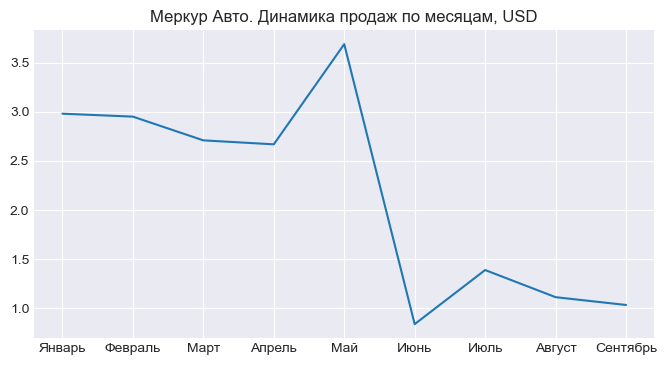

In [111]:
# посмотрим как распределялись продажи по месяцам
mercur_monthly = mercur_df.groupby('month', as_index=False)['sell_price_usd'].sum()
# построим график выручки по месяцам

plt.figure(figsize=(8, 4))
plt.plot(mercur_monthly.month.dt.month_name(locale='ru_Ru'), mercur_monthly.sell_price_usd/1000000)
plt.title('Меркур Авто. Динамика продаж по месяцам, млн.USD');

plt.show()

Из графика видно, что в июне произошёл резкий спад, который не восстановился к сентябрю. Необходимо будет проанализировать данную ситуацию. Посмотрим на продажи, но уже в разрезе продаваемых марок, это позволит понять, была ли просадка в целом, или по конкретным маркам.

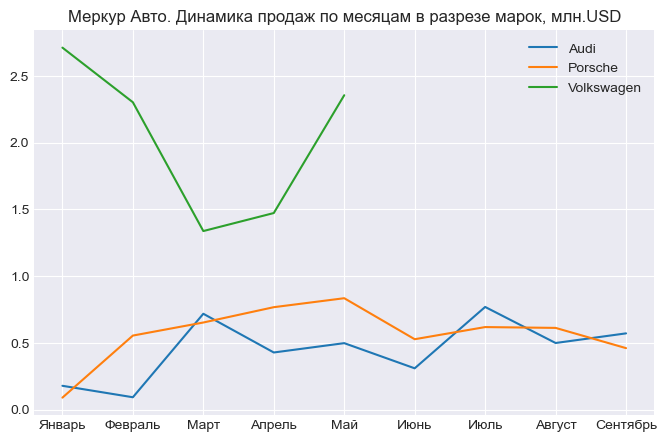

In [200]:
mercur_brands = mercur_df.brand.unique().tolist()
# постром график продаж в разрезе марок
plt.figure(figsize=(8, 5))

for i in mercur_brands:
    data = mercur_df[mercur_df.brand == i].groupby('month', as_index=False)['sell_price_usd'].sum()
    plt.plot(data.month.dt.month_name(locale='ru_Ru'), data.sell_price_usd/1000000)
    
plt.title('Меркур Авто. Динамика продаж по месяцам в разрезе марок, млн.USD')
plt.legend(mercur_brands)
plt.show()

На графике явно видно, что продажи Ауди и Порше немного растут с начала  года, потом держаться на одном уровне, однако, начиная с июня, продажи Фольксвагена полностью прекратились, что объясняет резкий спад.  
Несколько предположений: удилера закончились права на продажу автомобилей Фольксвагена, продажи этой марки перешли из Меркура куда-то ещё. Необходимо детальнее рассмотреть ситуацию.

### Конкурентный анализ

Определим, какую позицию на рынке занимает Меркур Авто.

In [346]:
competitors = df.groupby('company', as_index=False).agg(revenue = ('sell_price_usd', 'sum'))
# рассчитаем доли дилеров в общей выручке и количестве проданных машин
competitors['revenue_share'] = competitors['revenue'].apply(lambda x: x/competitors['revenue'].sum()*100)
# проставим рейтинги от большего к меньшему
competitors['rank_rev']  = competitors['revenue_share'].rank(ascending=False)
# определим позиции Меркур Авто
competitors[competitors.company == 'Mercur Auto']

,company,revenue,revenue_share,rank_rev
11,Mercur Auto,19355275.98,1.43,10.00


Меркур авто занимает 10 место по общей выручке (1.4% рынка) и 11 по количеству проданных автомобилей (1.2%).  
Определим конкурентов Меркура по продаваемым маркам автомобилей.

In [352]:
# посчитаем доли продаж по маркам автомобилей
mercur_df.brand.value_counts(normalize=True)

brand
Volkswagen   0.84
Audi         0.08
Porsche      0.08
Name: proportion, dtype: float64

In [233]:
# сперва найдём конкурентов, которые продают аналогичные марки
for i in mercur_brands:
    print(f'Автомобили {i} продают: {df[df.brand == i].company.unique()}')

Автомобили Audi продают: ['Mercur Auto']
Автомобили Porsche продают: ['Mercur Auto']
Автомобили Volkswagen продают: ['Mercur Auto' 'Volkswagen Group Rus' 'Автодом Motors KST' 'Автомир-Центр'
 'ТОО "Eurasia Motor Zhaik"']


Фольксваген занимает 84% всех продаж Mercur Auto, по 8% приходится на Ауди и Порше.  
Меркур Авто является эксклюзивным дистрибьютором Audi и Porsche, по Фольксвагену у него имеются четыре конкурента: Volkswagen Group Rus, Автодом Motors KST, Автомир-Центр, ТОО "Eurasia Motor Zhaik".  
Посмотрим на динамику их продаж.

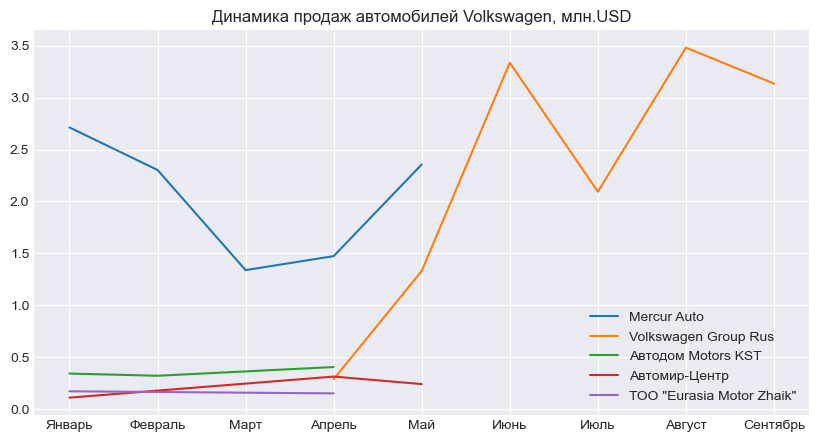

In [245]:
volkswagen_dealers = df[df.brand == 'Volkswagen'].company.unique().tolist()

# постром график
plt.figure(figsize=(10, 5))

for i in volkswagen_dealers:
    data = df[(df.brand == 'Volkswagen') & (df.company == i)].groupby('month', as_index=False)['sell_price_usd'].sum()
    plt.plot(data.month.dt.month_name(locale='ru_Ru'), data.sell_price_usd/1000000)
    
plt.title('Динамика продаж автомобилей Volkswagen, млн.USD')
plt.legend(volkswagen_dealers)
plt.show()

Из графика видно, что компания Volkswagen Group Rus начала продавать машины с апреля, при этом у Автодом Motors KST и ТОО "Eurasia Motor Zhaik продажи в апреле совсем прекратились. Меркур Авто и Автомир-Центр ещё продавали машины в мае, но далее и у них прекратились все продажи.  
Можем сделать вывод о том, что, начиная с апреля 2019 года, Volkswagen Group Rus решил самостоятельно, без дистрибьютеров, продавать машины своей марки. В мае остальные дилеры либо распродавали остатки машин, либо котракты закончились у дилеров в разное время: у двух в апреле, у остальных - в мае.  
Учитывая, огромную долю Фольксвагена у Меркур Авто, и то, что с июня месяца его продажи сократились более, чем в 3 раза, ситуацию к концу года для Меркур Авто можно назвать тяжёлой. Перспектив вернуть потерянные позиции без привлечения новых контрактов практически нет.  
Ситуация с марками прояснилась, посмотрим на конкурентов в разрезе продаваемых сегментов машин и регионов.

In [276]:
# регионы присутствия Меркур Авто (за исключением тех, где продавался Фольксваген)
mercur_loc = mercur_df.state.unique().tolist()
mercur_loc_no_vw = mercur_df[mercur_df.brand != 'Volkswagen'].state.unique().tolist()
print(f'Всего Меркур Авто предстален в {len(mercur_loc)} областях: {mercur_loc}')
print(f'Машины марок Ауди и Порше продаются только в {mercur_loc_no_vw}')

Всего Меркур Авто предстален в 6 областях: ['г.Алматы', 'г.Нур-Султан', 'Костанайская область', 'Атырауская область', 'Карагандинская область', 'Западно-Казахстанская область']
Машины марок Ауди и Порше продаются только в ['г.Алматы', 'г.Нур-Султан', 'Костанайская область']


In [315]:
# определим основные регионы продаж Меркур Авто
mercur_df.groupby('state', as_index=False).agg(sales = ('quantity', 'sum')).sort_values('sales', ascending=False)

,state,sales
4,г.Алматы,484.00
5,г.Нур-Султан,59.00
0,Атырауская область,43.00
3,Костанайская область,26.00
2,Карагандинская область,23.00
1,Западно-Казахстанская область,15.00


Основным регионами являются г.Алматы иг. Астана. Найдём конкурентов по этим регионам.

In [349]:
mercur_states = ['г.Алматы', 'г.Нур-Султан']

competitors_by_state = df[df.state.isin(mercur_states)].groupby('company', as_index=False).agg(revenue = ('sell_price_usd', 'sum'))
# рассчитаем доли дилеров в общей выручке
competitors_by_state['revenue_share'] = competitors_by_state['revenue'].apply(lambda x: x/competitors_by_state['revenue'].sum()*100)

competitors_by_state.sort_values('revenue', ascending=False)[:10]

,company,revenue,revenue_share
17,Toyota Motor Kazakhstan,302705161.81,42.09
2,Astana Motors,119953493.62,16.68
21,БИПЭК АВТО,58073654.13,8.08
10,Nissan Manufacturing RUS,27633633.77,3.84
20,Автоцентр-Бавария,24010734.35,3.34
26,ТК КАМАЗ,23165464.69,3.22
3,Autokapital,17169968.98,2.39
9,Mercur Auto,17028508.97,2.37
22,Вираж,12269431.87,1.71
12,Renault Россия,10470685.76,1.46


In [ ]:
competitors_by_state[competitors_by_state.company == 'Mercur Auto']

В двух самых крупных городах Меркур Авто занимает 8 место как по числу проданных машин, так и по выручке. Основными конкурентами являются: Autokapital, Вираж, Renault Россия, Ravon Motors Kazakstan, Автоцентр-Бавария.  
Лидерами рынка в этих городах являются Toyota Motor Kazakhstan, Astana Motors - их можно считать основными игроками на рынке, доля всех остальных дилеров составляет 41.3%.

In [279]:
# определим основные сегменты автомобилей, которые продаёт Меркур
mercur_df.groupby('segment_2013', as_index=False).agg(sales = ('quantity', 'sum')).sort_values('sales', ascending=False)

,segment_2013,sales
2,Легковые автомобили,473.00
0,Внедорожники,162.00
1,Коммерческие автомобили,8.00
3,Минивэны,5.00
4,Пикапы,2.00


Больше всего Меркур продаёт легковые машины и внедорожники. В случае, если дилер сможет заменить Фольксваген другими марками, скорее всего сегменты останутся прежними.  
Определим конкурентов в разрезе сегментов автомобилей.

In [340]:
mercur_segments = ['Легковые автомобили', 'Внедорожники']
competitors_by_segment = df[df.segment_2013.isin(mercur_segments)].groupby('company', as_index=False).agg(revenue = ('sell_price_usd', 'sum'))
# рассчитаем доли дилеров в общей выручке
competitors_by_segment['revenue_share'] = competitors_by_segment['revenue'].apply(lambda x: x/competitors_by_segment['revenue'].sum()*100)

competitors_by_segment.sort_values('revenue', ascending=False).reset_index(drop=True)[:10]

,company,revenue,revenue_share
0,Toyota Motor Kazakhstan,454439734.94,40.88
1,Astana Motors,228447855.76,20.55
2,БИПЭК АВТО,159494657.95,14.35
3,Nissan Manufacturing RUS,46289495.68,4.16
4,Автоцентр-Бавария,29219721.33,2.63
5,Allur Auto,28039746.42,2.52
6,Renault Россия,23680291.43,2.13
7,Mercur Auto,18746632.92,1.69
8,Subaru Kazakhstan,16158331.08,1.45
9,MMC RUS,15035601.57,1.35


В разрезе сегментов Меркур Авто также занимает 8 место с долей рынка легковых автомобилей и внедорожников - 1.7%. Ближайшими конкурентами в этих сегментах являются: Allur Auto, Renault Россия, Subaru Kazakhstan, MMC RUS.

---
Анализируя конкурентов в целом по рынку, по продаваемым маркам и в разрезе областей и сегментов машин, основными конкурентами Mercur Auto являются: Autokapital, Renault Россия и Subaru Kazakhstan. Учитывая, что Mercur Auto перестал продавать 

### Матрица BCG

Ради эксперимента, построим матрицу-BCG для всего рынка автомобилей.

In [360]:
import plotly.express as px

In [460]:
bcg_df = df.groupby(['full_names', 'month'])['sell_price_usd'].sum().reset_index().copy()
bcg_df['perc_total'] = bcg_df.groupby('full_names')['sell_price_usd'].transform('sum') / bcg_df.sell_price_usd.sum() * 100
bcg_df['grow'] = bcg_df.groupby('full_names')['sell_price_usd'].transform('last') / bcg_df.sort_values(by='month')\
                .groupby('full_names')['sell_price_usd'].transform('first') * 100
bcg_df['total'] = bcg_df.groupby('full_names')['sell_price_usd'].transform('sum')

In [459]:
# построим график
# # цвет кругов в зависимости от квадранта
color_scheme = ["#0492C2"] * 11
color_scheme[5] = '#028A0F'
color_scheme[0], color_scheme[2] = '#FCAE1E', '#FCAE1E'

fig = px.scatter(bcg_df[(bcg_df.perc_total > 1) & (bcg_df.grow < 600)], # почистим от выбросов
                 x="perc_total", y="grow", 
                 size="total", color="full_names", 
                 size_max=75, 
                 text='full_names',
                 color_discrete_sequence=color_scheme,
                 title="BCG matrix Mercur Auto",
                 width=1000, height=800)

# # добавим квадранты матрицы
fig.add_shape(type='line', x0=0, y0=300, x1=40, y1=300, line=dict(color='black', dash='dash', width=3))
fig.add_shape(type='line', x0=20, y0=0, x1=20, y1=600, line=dict(color='black', dash='dash', width=3))

# # добавим подписи квадртантов
fig.add_annotation(x=18.5, y=280, text="<b>Собаки</b>", showarrow=False)
fig.add_annotation(x=16.5, y=580, text="<b>Проблемные дети</b>", showarrow=False)
fig.add_annotation(x=38.5, y=580, text="<b>Звезды</b>", showarrow=False)
fig.add_annotation(x=37, y=280, text="<b>Дойные коровы</b>", showarrow=False)

# уберем легенду
fig.update_layout(showlegend=False, xaxis_title="Доля в прибыли, %", yaxis_title="Изменение объема продаж, %")

fig.show()

В матрице BCG без учета экстремально малых и больших значений, большинство моделей находятся в зоне "Собаки": относительно небольшая доля рынка, низкие темпы роста. В целом, можно отметить, что рынок в Казахстане устоявшийся, резких изменений или появления новинок на рынке в 2019 году не было.

### Выводы

По стостоянию на сентябрь 2019 года, дилер Меркур Авто, занимает на момент конца исследования (сентябрь 2019г), 11 место в рейтинге по объему продаж, 1.4% объёма рынка. За 9 месяцев дилер продал 650 машин и заработал 19 355 276 USD, среднемесячная выручка составила 2 150 586 USD.  
Топ-5 моделей по объёму продаж составили: Volkswagen Polo, Porsche Cayenne, Volkswagen Tiguan, Audi Q8, Porsche Panamera.  
Всего Меркур авто занимался продажей в 6 регионах страны, а без учёта Фольксвагена - в трёх.  

С июня 2019 года, в связи с прекращение продаж автомбилей Фольксваген, продажи компании резко снизились (почти в 3 раза). 
Информации о причинах в открытых источниках обнаружить не удалось. Можно предположить, что Volkswagen разорвал контракты с разными дистрибьюторами и стал продавать машины сам через единую компанию.

Чтобы Mercur Auto восстановить утраченные позиции необходимо либо искать новых поставщиков и заключать дистрибьютерские контракты, либо наращивать объём продаж Audi и Porsche, что кажется затруднительным, т.к. это машины более дорогого сегмента.